## Final Tutorial: Analysis of Football Players
## Predicting the Value of Football (Soccer) Players
Aditya Ranjan, Aniket Nayak

## Overview

Football (or soccer) is the most popular sport in the world, followed by 3.5 billion fans. As a result, professional clubs strive to recruit talented football players and are willing to pay tens of millions of euros for players of immense quality. This leads to some questions about what characteristics form a valuable player — is it pace, shooting, passing? What traits result in professional football players being worth so much money? 

The dataset used in this analysis comes from: https://www.kaggle.com/datasets/stefanoleone992/fifa-22-complete-player-dataset?select=players_22.csv 

This dataset includes player data from the video games FIFA 15 to FIFA 22. The player data is based on actual game performance and ratings from sofifa (Example data from the player Lionel Messi: https://sofifa.com/player/158023/lionel-messi/220002). Various information about each player (age, height, pace, shooting, etc.) is stored for over 16000 players. The goal of this analysis is to predict the value of football players based on these factors and understand which factors primarily impact a player's value.


## Outline/Table of Contents

1. Data Curation and Representation
2. Exploratory Data Analysis
3. Linear Models and Hypothesis Testing
4. Summary of Insights

### Data Curation and Representation

In this section of the notebook, we will be taking some necessary steps before we can start analyzing the data. this includes removing any irrelevant features given our goal of predicting the monetary value of football players. We will also be filling in any missing values or getting rid of rows with them depending on their distributions. Overall, we will be sifting through the data and cleaning up as necessary so that we can represent the data in a format that is suitable for performing some analysis on the features available.

Making the necessary imports — 
pandas:     https://pandas.pydata.org/pandas-docs/stable/ 
numpy:      https://docs.scipy.org/doc/numpy/user/ 
matplotlib: https://matplotlib.org/contents.html 
seaborn: https://seaborn.pydata.org/

In [99]:
# importing in the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from statsmodels.formula.api import ols

Data is taken from: https://www.kaggle.com/datasets/stefanoleone992/fifa-22-complete-player-dataset?select=players_22.csv in the form of a CSV (comma separated value) file.

In [ ]:
# creating a pandas dataframe using the csv file
data = pd.read_csv("/Users/adi/Downloads/players_22.csv")

In [101]:
# visualizing the first five rows of the dataframe
data.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


Each row of the dataframe corresponds to a specfic player and each column contains specific information under a category for each respective player.

In [102]:
# looking at the various columns in this dataframe
print(list(data.columns))

['sofifa_id', 'player_url', 'short_name', 'long_name', 'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur', 'age', 'dob', 'height_cm', 'weight_kg', 'club_team_id', 'club_name', 'league_name', 'league_level', 'club_position', 'club_jersey_number', 'club_loaned_from', 'club_joined', 'club_contract_valid_until', 'nationality_id', 'nationality_name', 'nation_team_id', 'nation_position', 'nation_jersey_number', 'preferred_foot', 'weak_foot', 'skill_moves', 'international_reputation', 'work_rate', 'body_type', 'real_face', 'release_clause_eur', 'player_tags', 'player_traits', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power

#### Removing Unnecessary Data

The following columns are not needed because they 1) don't provide meaningful insight and 2) are not relevant for this analysis: sofifa_id, player_url, long_name (short_name will be better for viz), dob, club_team_id, league_name, club_jersey_number, club_loaned_from,
club_joined, club_contract_valid_until, nationality_id, nationality_name, nation_team_id, nation_position, nation_jersey_number, real_face, goalkeeping_speed (nan),
player_face_url, club_logo_url, clubg_flag_url, nation_logo_url, nation_flag_url, league_level, club_position, player_tags, player_traits


In [103]:
# list of cols that are not being considered
cols_to_remove = ["sofifa_id", "player_url", "long_name", "dob", "club_team_id", "league_name", "club_jersey_number", "club_loaned_from",
"club_joined", "club_contract_valid_until", "nationality_id", "nationality_name", "nation_team_id", "nation_position", "nation_jersey_number",
"real_face", "goalkeeping_speed","player_face_url", "club_logo_url", "club_flag_url", "nation_logo_url", "nation_flag_url", "league_level",
"club_position", "player_tags", "player_traits"]

To further elaborate, columns like "dob" or "nation_team_id" are not quantifiable values that can be correlated to a player's value. Hence, they are cut out of the dataset.

In [104]:
# removing all the unconsidered columns from the dataframe
data.drop(cols_to_remove, axis = 1, inplace = True)
data

,short_name,player_positions,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_name,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,L. Messi,"RW, ST, CF",93,93,78000000.0,320000.0,34,170,72,Paris Saint-Germain,...,64+3,64+3,64+3,66+3,61+3,50+3,50+3,50+3,61+3,19+3
1,R. Lewandowski,ST,92,92,119500000.0,270000.0,32,185,81,FC Bayern München,...,66+3,66+3,66+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3
2,Cristiano Ronaldo,"ST, LW",91,91,45000000.0,270000.0,36,187,83,Manchester United,...,59+3,59+3,59+3,63+3,60+3,53+3,53+3,53+3,60+3,20+3
3,Neymar Jr,"LW, CAM",91,91,129000000.0,270000.0,29,175,68,Paris Saint-Germain,...,63+3,63+3,63+3,67+3,62+3,50+3,50+3,50+3,62+3,20+3
4,K. De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,181,70,Manchester City,...,80+3,80+3,80+3,79+3,75+3,69+3,69+3,69+3,75+3,21+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,Song Defu,CDM,47,52,70000.0,1000.0,22,180,64,Wuhan FC,...,46+2,46+2,46+2,48+2,48+2,46+2,46+2,46+2,48+2,15+2
19235,C. Porter,CM,47,59,110000.0,500.0,19,175,70,Derry City,...,46+2,46+2,46+2,49+2,48+2,44+2,44+2,44+2,48+2,14+2
19236,N. Logue,CM,47,55,100000.0,500.0,21,178,72,Finn Harps,...,46+2,46+2,46+2,47+2,47+2,45+2,45+2,45+2,47+2,12+2
19237,L. Rudden,ST,47,60,110000.0,500.0,19,173,66,Finn Harps,...,29+2,29+2,29+2,33+2,32+2,26+2,26+2,26+2,32+2,15+2


After dropping unconsidered factors, there are 84 columns, down from the original 110.

#### Missing Values

In our data, any missing values correspond to nans. We want to see if it is possible for us to simply drop all the rows with any missing information. If not, and this would reduce our data size significantly, we could perform an alternative method of filling those in with measures of center such as applying the mean or median. Again, we have to take a look at the data first if we need to do this, but if we had to, we would have to analyze the distributions for outliers to see what measures are appropriate.

In [105]:
# creating a dictionary that will map column name to % of NaN data
missing_dict = dict()

# iterating through each column, calculating what % of data is NaN, and adding to map
for col in data.columns:
    missing_dict[col] = data[col].isnull().sum() / len(data) * 100

In [106]:
# looking for cols with highest percentage of nans
{k: v for k, v in sorted(missing_dict.items(), key=lambda item: item[1], reverse=True)}

{'pace': 11.081657050782265,
 'shooting': 11.081657050782265,
 'passing': 11.081657050782265,
 'dribbling': 11.081657050782265,
 'defending': 11.081657050782265,
 'physic': 11.081657050782265,
 'release_clause_eur': 6.112583814127554,
 'value_eur': 0.38463537605904674,
 'wage_eur': 0.31706429648110607,
 'club_name': 0.31706429648110607,
 'short_name': 0.0,
 'player_positions': 0.0,
 'overall': 0.0,
 'potential': 0.0,
 'age': 0.0,
 'height_cm': 0.0,
 'weight_kg': 0.0,
 'preferred_foot': 0.0,
 'weak_foot': 0.0,
 'skill_moves': 0.0,
 'international_reputation': 0.0,
 'work_rate': 0.0,
 'body_type': 0.0,
 'attacking_crossing': 0.0,
 'attacking_finishing': 0.0,
 'attacking_heading_accuracy': 0.0,
 'attacking_short_passing': 0.0,
 'attacking_volleys': 0.0,
 'skill_dribbling': 0.0,
 'skill_curve': 0.0,
 'skill_fk_accuracy': 0.0,
 'skill_long_passing': 0.0,
 'skill_ball_control': 0.0,
 'movement_acceleration': 0.0,
 'movement_sprint_speed': 0.0,
 'movement_agility': 0.0,
 'movement_reactions':

From above, it is evident that factors like pace, shooting, passing, dribbling, defending, and physic columns contain the largest portion of NaN data — around 11% each.

In [107]:
# Calculating % of total data that is NaN
len(data.dropna()) / len(data) * 100

83.26836114143147

Around 83% of the data would remain after dropping NaN values, which is acceptable for a dataset of this size, so the NaNs will be dropped.

In [108]:
# dropping NaN data and reformatting indices
data.dropna(inplace = True, )
data.reset_index(inplace = True, drop = True)

In [109]:
data

,short_name,player_positions,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_name,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,L. Messi,"RW, ST, CF",93,93,78000000.0,320000.0,34,170,72,Paris Saint-Germain,...,64+3,64+3,64+3,66+3,61+3,50+3,50+3,50+3,61+3,19+3
1,R. Lewandowski,ST,92,92,119500000.0,270000.0,32,185,81,FC Bayern München,...,66+3,66+3,66+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3
2,Cristiano Ronaldo,"ST, LW",91,91,45000000.0,270000.0,36,187,83,Manchester United,...,59+3,59+3,59+3,63+3,60+3,53+3,53+3,53+3,60+3,20+3
3,Neymar Jr,"LW, CAM",91,91,129000000.0,270000.0,29,175,68,Paris Saint-Germain,...,63+3,63+3,63+3,67+3,62+3,50+3,50+3,50+3,62+3,20+3
4,K. De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,181,70,Manchester City,...,80+3,80+3,80+3,79+3,75+3,69+3,69+3,69+3,75+3,21+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16015,Song Defu,CDM,47,52,70000.0,1000.0,22,180,64,Wuhan FC,...,46+2,46+2,46+2,48+2,48+2,46+2,46+2,46+2,48+2,15+2
16016,C. Porter,CM,47,59,110000.0,500.0,19,175,70,Derry City,...,46+2,46+2,46+2,49+2,48+2,44+2,44+2,44+2,48+2,14+2
16017,N. Logue,CM,47,55,100000.0,500.0,21,178,72,Finn Harps,...,46+2,46+2,46+2,47+2,47+2,45+2,45+2,45+2,47+2,12+2
16018,L. Rudden,ST,47,60,110000.0,500.0,19,173,66,Finn Harps,...,29+2,29+2,29+2,33+2,32+2,26+2,26+2,26+2,32+2,15+2


Dataframe now contains 16020 rows.

One thing that is noticeable is that the player_positions collumn has the positions that the players actively play and then the last few columns of the dataframe is a larger set of positions which contain the respective ratings of each players for those positions. However, we do not need some of those position rating columns if none of the players have posiitons categorized exactly as those. So let's see what we can get rid of from those columns to make our analysis easier.

In [110]:
# list of all positions players can have (left wing, center attacking midfielder, etc.)
player_positions = list(set(", ".join(data["player_positions"]).split(", ")))
player_positions

['LWB',
 'CM',
 'RB',
 'RW',
 'CF',
 'CDM',
 'CB',
 'RM',
 'LB',
 'LW',
 'ST',
 'LM',
 'CAM',
 'RWB']

In the dataset, ratings are stored in the form of "rating+potential" like "80+3". The first integer represents the player's current standing and the second integer describes a new level the player could reach. The potential factor should be discarded because it is not representative of the player's current stats. Now that we know we want only the above columns' ratings for each player, we can convert the format of "rating+potential" to simply rating. This will help us later on as we correlate numerical features and perform regression using these features. The potential rating changes are every minimal and do not matter as much.

In [111]:
# changing 60+2 to 60 for example in the last couple of columns (used to clean the data)

def convert_pos_to_int(pos_string):
    if "+" in pos_string:
        return int(pos_string[0:pos_string.index("+")])
    elif "-" in pos_string:
        return int(pos_string[0:pos_string.index("-")])
    else:
        return int(pos_string)

position_cols = ['ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk']

# get rid of any of those last columns that is not in the smaller list we have created above,
# which are the positions that the players in the dataset actually play
for position_col in position_cols:
    if position_col.upper() in player_positions:
        data[position_col] = data[position_col].apply(lambda row: convert_pos_to_int(row))
    else:
        data.drop(position_col, axis = 1, inplace = True)

In [112]:
data

,short_name,player_positions,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_name,...,cam,lm,cm,rm,lwb,cdm,rwb,lb,cb,rb
0,L. Messi,"RW, ST, CF",93,93,78000000.0,320000.0,34,170,72,Paris Saint-Germain,...,93,91,87,91,66,64,66,61,50,61
1,R. Lewandowski,ST,92,92,119500000.0,270000.0,32,185,81,FC Bayern München,...,86,84,80,84,64,66,64,61,60,61
2,Cristiano Ronaldo,"ST, LW",91,91,45000000.0,270000.0,36,187,83,Manchester United,...,86,86,78,86,63,59,63,60,53,60
3,Neymar Jr,"LW, CAM",91,91,129000000.0,270000.0,29,175,68,Paris Saint-Germain,...,89,89,82,89,67,63,67,62,50,62
4,K. De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,181,70,Manchester City,...,89,89,89,89,79,80,79,75,69,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16015,Song Defu,CDM,47,52,70000.0,1000.0,22,180,64,Wuhan FC,...,46,47,46,47,48,46,48,48,46,48
16016,C. Porter,CM,47,59,110000.0,500.0,19,175,70,Derry City,...,47,49,47,49,49,46,49,48,44,48
16017,N. Logue,CM,47,55,100000.0,500.0,21,178,72,Finn Harps,...,47,48,47,48,47,46,47,47,45,47
16018,L. Rudden,ST,47,60,110000.0,500.0,19,173,66,Finn Harps,...,45,45,39,45,33,29,33,32,26,32


After all of this pruning, we now have a dataframe with 16020 rows and 71 columns.

### Exploratory Data Analysis

Now that our data has been cleaned, we can move onto analyzing it.
In this section, we will see some basic summary statistics based on the clubs that are a part of the dataset and value in terms of euros. This will help us
get an understanding of one of the categorical variables. In addition to this, we will also take a look at some basic visualizations that show the distributions
of the numeric features. We want ot see how the features are distributed so that they behave as intended if we create a linear model with them. In general, these distributions
should be somewhat symmetrical unless they are monetary features, which could understandably have outliers due to the nature of a few players making a lot more than others.
Finally, we will also take a look at relationships between the variables themselves by plotting them and also calculating the correlation coefficient.

Let's first take a broad overview look of football clubs, interpret how much money they're worth in total, and inspect the most valuable clubs.

In [113]:
# look at clubs and average values
print("Total unique clubs:", len(data["club_name"].unique()))

# calculating total club value based on how much each of their player's are worth and summing together
cv = data.groupby("club_name")["value_eur"].sum()
cv=cv.sort_values(ascending=False)
print(cv)

Total unique clubs: 701
club_name
Manchester City            1.193400e+09
Paris Saint-Germain        1.052900e+09
Liverpool                  9.559750e+08
FC Bayern München          9.514750e+08
Manchester United          9.438250e+08
                               ...     
Tianjin Jinmen Tiger FC    5.210000e+06
Waterford FC               4.775000e+06
SC East Bengal FC          4.105000e+06
Longford Town              3.555000e+06
NorthEast United FC        3.450000e+06
Name: value_eur, Length: 701, dtype: float64


As expected, the most well-known clubs have the greatest value, like Manchester City or PSG. Let's zoom in on the top 10 clubs.

In [114]:
# Looking at top 10 most valuable clubs and the total value of their players (euros)
i=0
t10 = []
for n in cv:
    if i == 10:
        break
    print(cv.keys()[i], ":", n)
    t10.append(cv.keys()[i])
    i+=1

Manchester City : 1193400000.0
Paris Saint-Germain : 1052900000.0
Liverpool : 955975000.0
FC Bayern München : 951475000.0
Manchester United : 943825000.0
Real Madrid CF : 891875000.0
Chelsea : 843775000.0
Atlético de Madrid : 771400000.0
FC Barcelona : 693800000.0
Tottenham Hotspur : 639600000.0


In the top 10 clubs, how do their player's value trend with their rating? By assumption, we can say that clubs will pay more for higher rated players. Is the correlation between player value and rating linear?

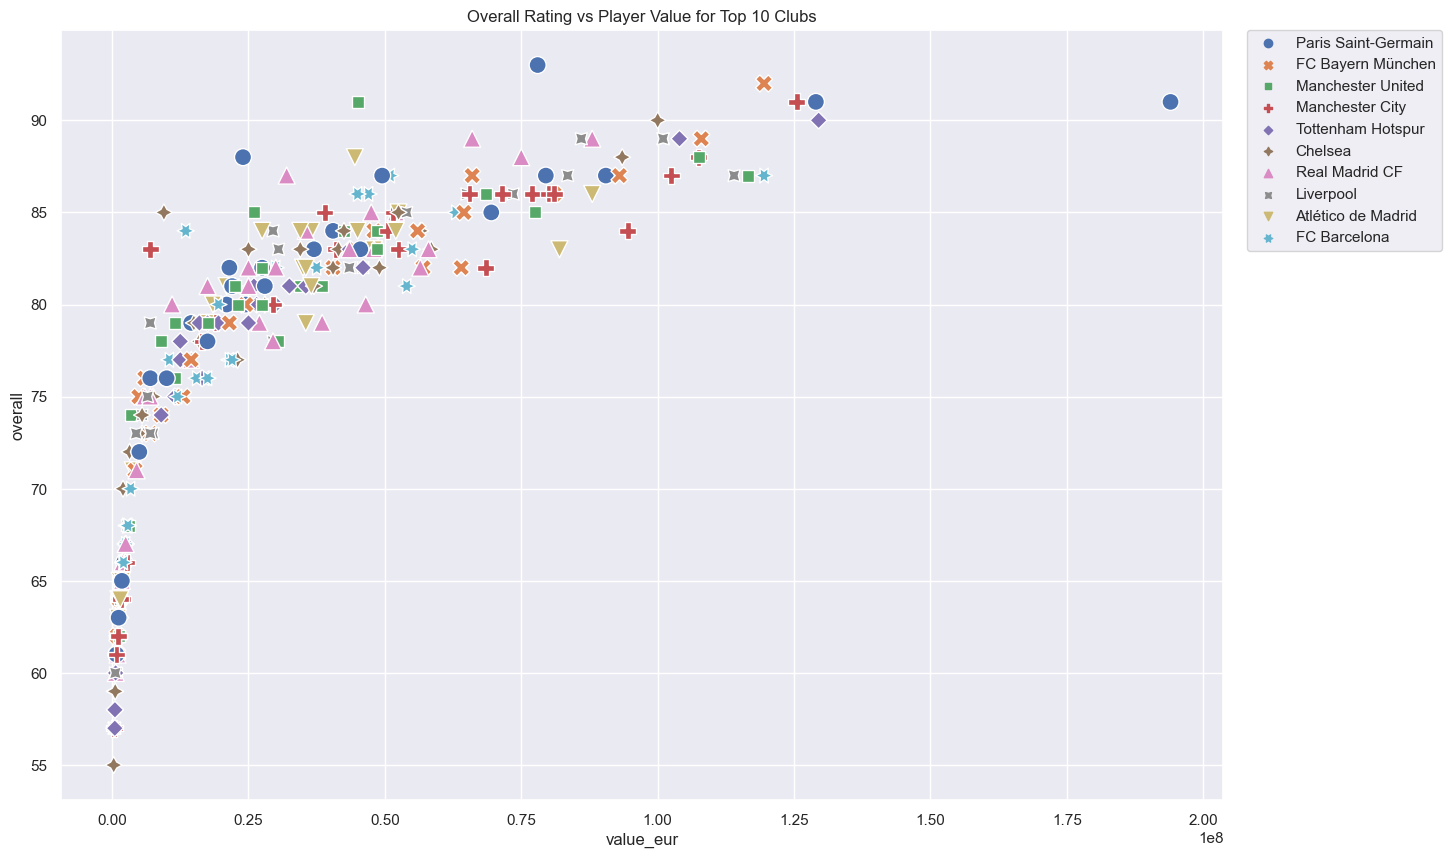

In [115]:
# breaking data down into just players in the top 10 clubs
top_ten  = data[data["club_name"].isin(t10)]

# creating plot to show player value by their overall rating (for the top 10 clubs only)
sns.set(rc = {'figure.figsize':(15,10)})
sns.scatterplot(data=top_ten, x="value_eur", y="overall", hue="club_name", style="club_name", s = 150)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title("Overall Rating vs Player Value for Top 10 Clubs")
plt.show()

The scatterplot above shows the trend that higher valued players have a greater overall rating, which is expected. Those players who perform well and have acquired a high rating must receive appropriate compensation. Interestingly, the graph has a logistic growth shape. This indicates that small increases in rating when rating is low is met with massive increases in player value, but this value increase decreases and eventually (almost) flatlines once rating is above the 85 mark. Consider: What other factors would result in various 90 rated players having different values despite having similar ratings (as shown in the graph above)?

Let's continue to the examine the dataset and find some correlations with player value.

In [116]:
# looking at the various columns (factors) in the dataset
# to figure out what features can be visualized
data.columns

Index(['short_name', 'player_positions', 'overall', 'potential', 'value_eur',
       'wage_eur', 'age', 'height_cm', 'weight_kg', 'club_name',
       'preferred_foot', 'weak_foot', 'skill_moves',
       'international_reputation', 'work_rate', 'body_type',
       'release_clause_eur', 'pace', 'shooting', 'passing', 'dribbling',
       'defending', 'physic', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defendin

The dataset contains a wide variety of information. There's some expected data like "age" and "club_name", but also unique factors like "mentality_aggression" and "skill_curve." Let's first understand the basics of football — what position each player plays and what conclusions can be drawn from that.

Below are some subplots that show the distribution of player's ratings for different positions.

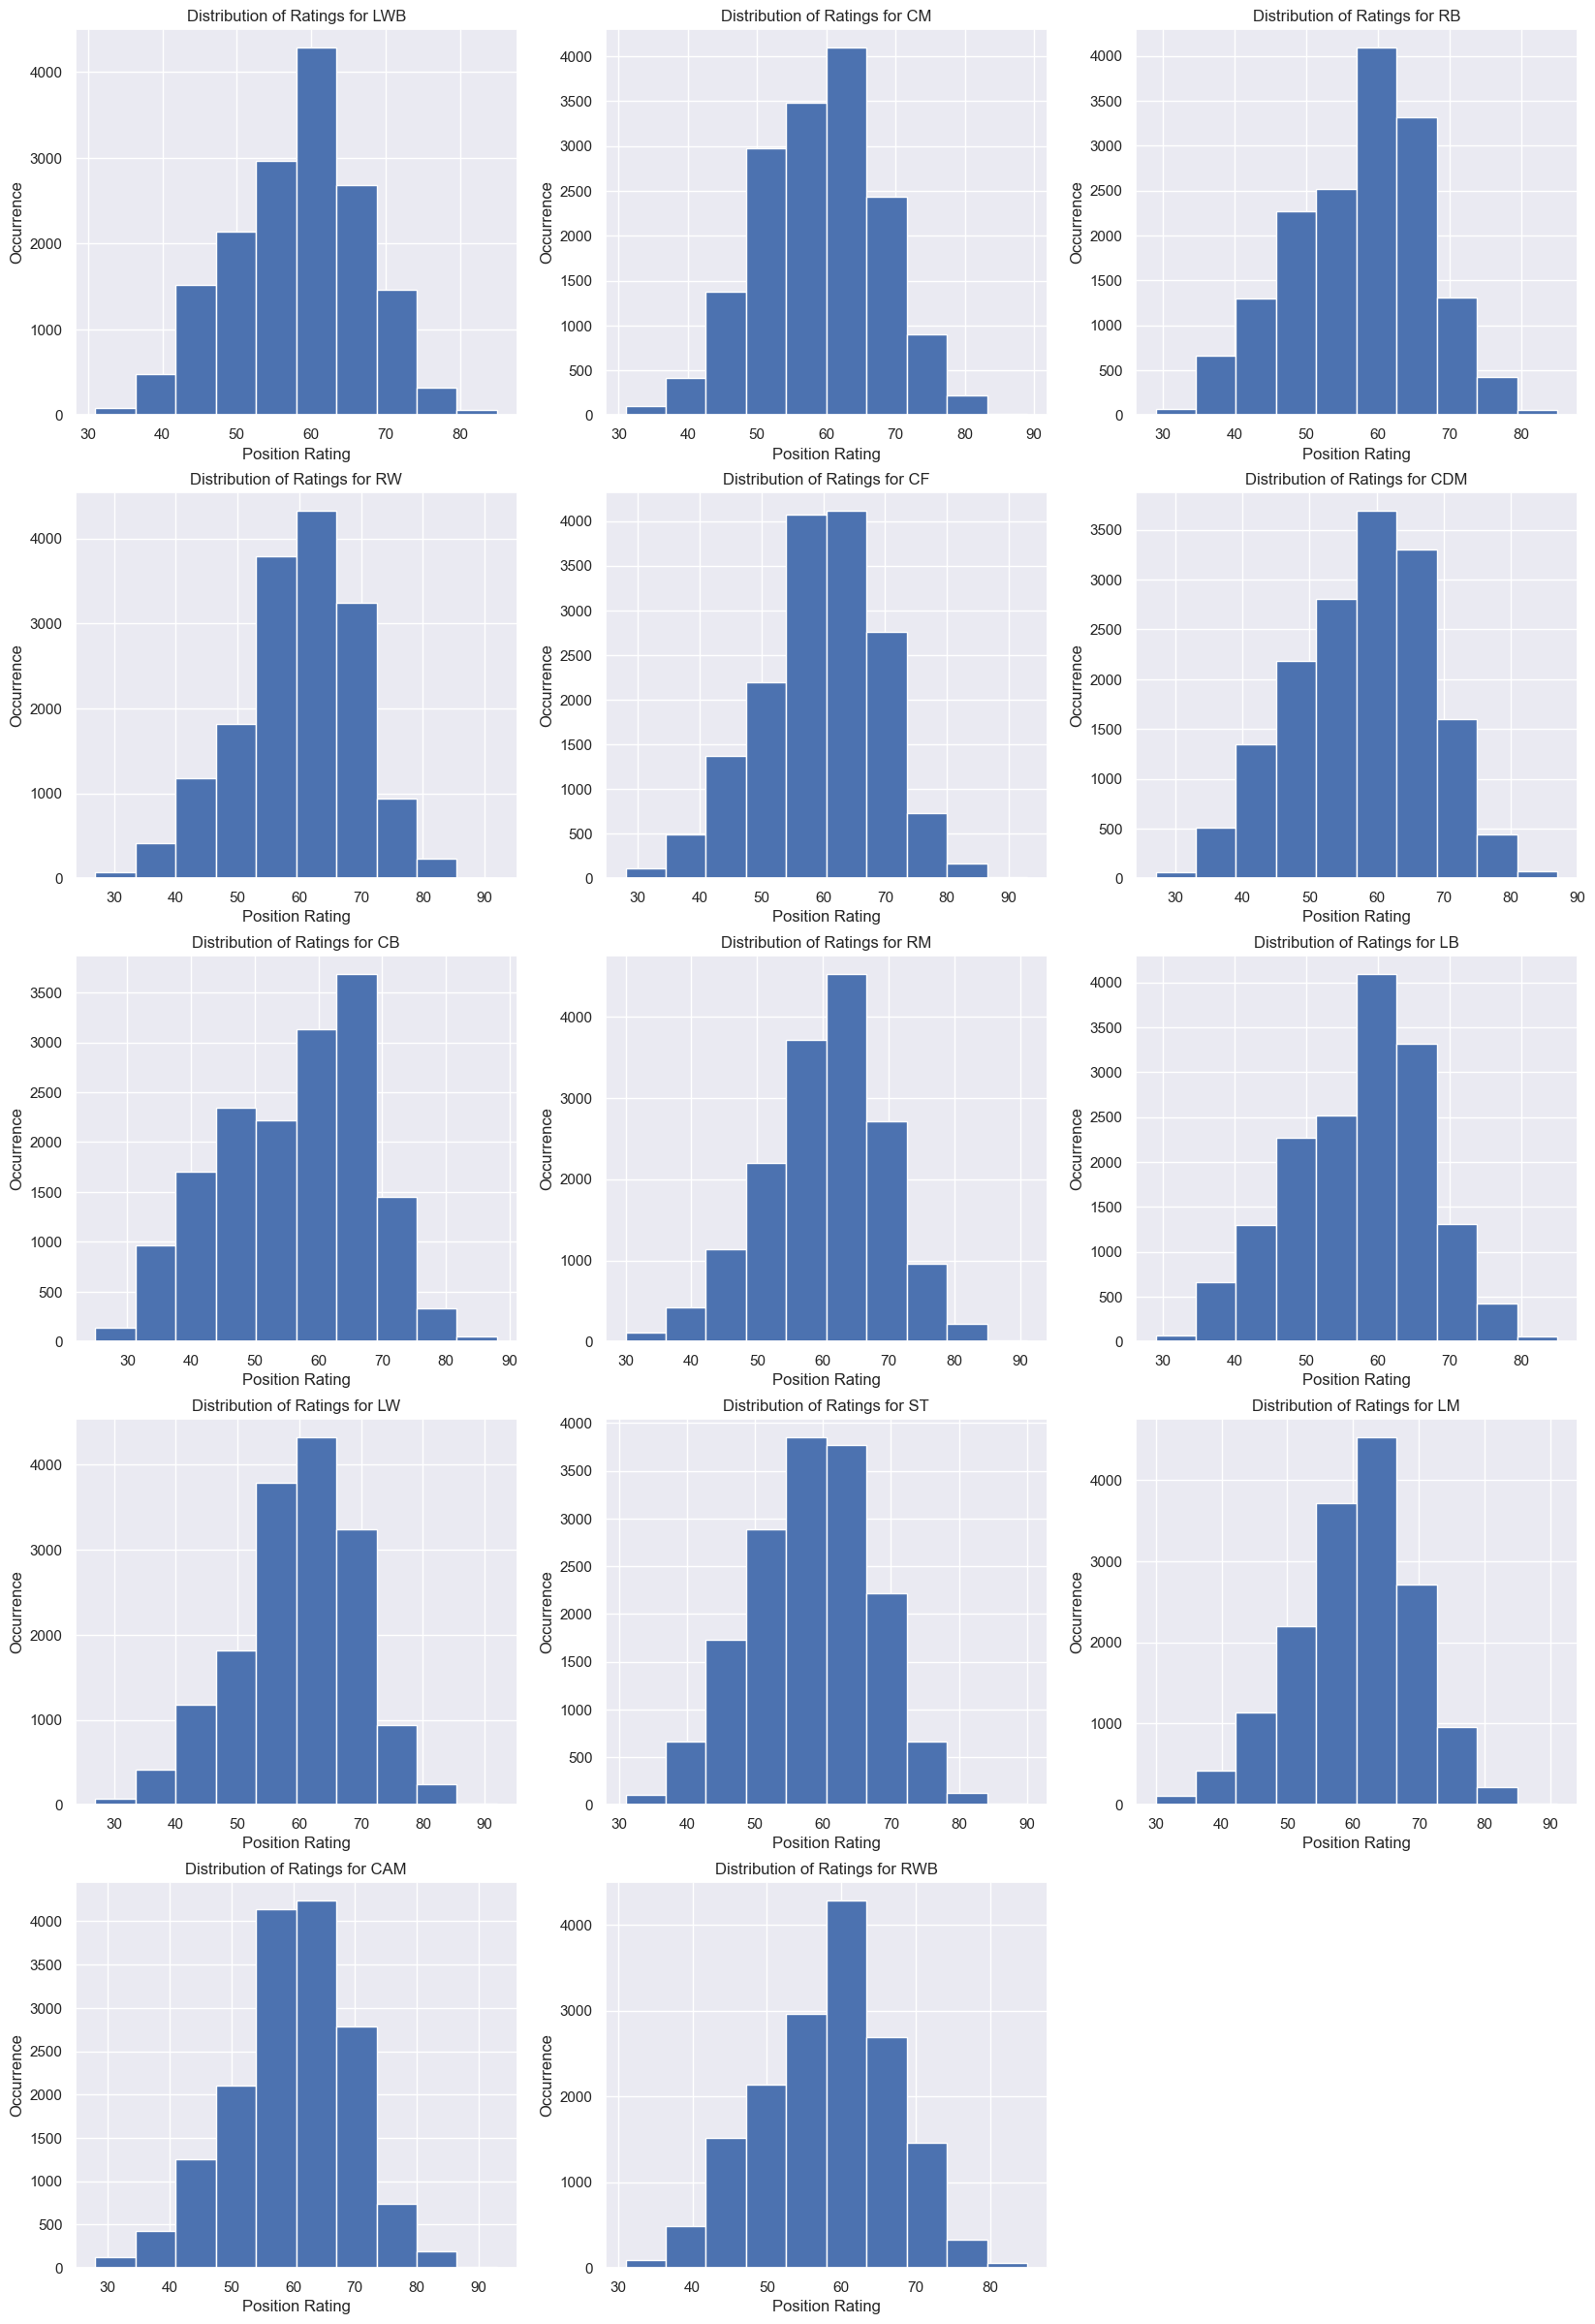

In [117]:
plt.rcParams["figure.figsize"] = (20, 30)

# creating a plot for each position that compares the rating by the occurrence in the dataframe
i = 1
for position in player_positions:
    plt.subplot(5, 3, i)

    plt.hist(data[position.lower()])

    plt.title("Distribution of Ratings for " + position)
    plt.xlabel("Position Rating")
    plt.ylabel("Occurrence")

    i += 1

plt.show()

Notice that each plot has a similar distribution, regardless of the position played. This is indicative of a well distributed dataset where there are players with different skills and characteristics. This will help our regression model as we are not skewed heavily by any one feature.

Below are some more subplots that show the distributions of more general features. Note that we use boxplots to visualize these as some of them have quite a few outliers which would make a histogram less suitable for this type of visualization. The factors being considered at 'overall', 'potential', 'value_eur', 'wage_eur', 'age', 'height_cm', 'weight_kg', and 'release_clause_eur.'

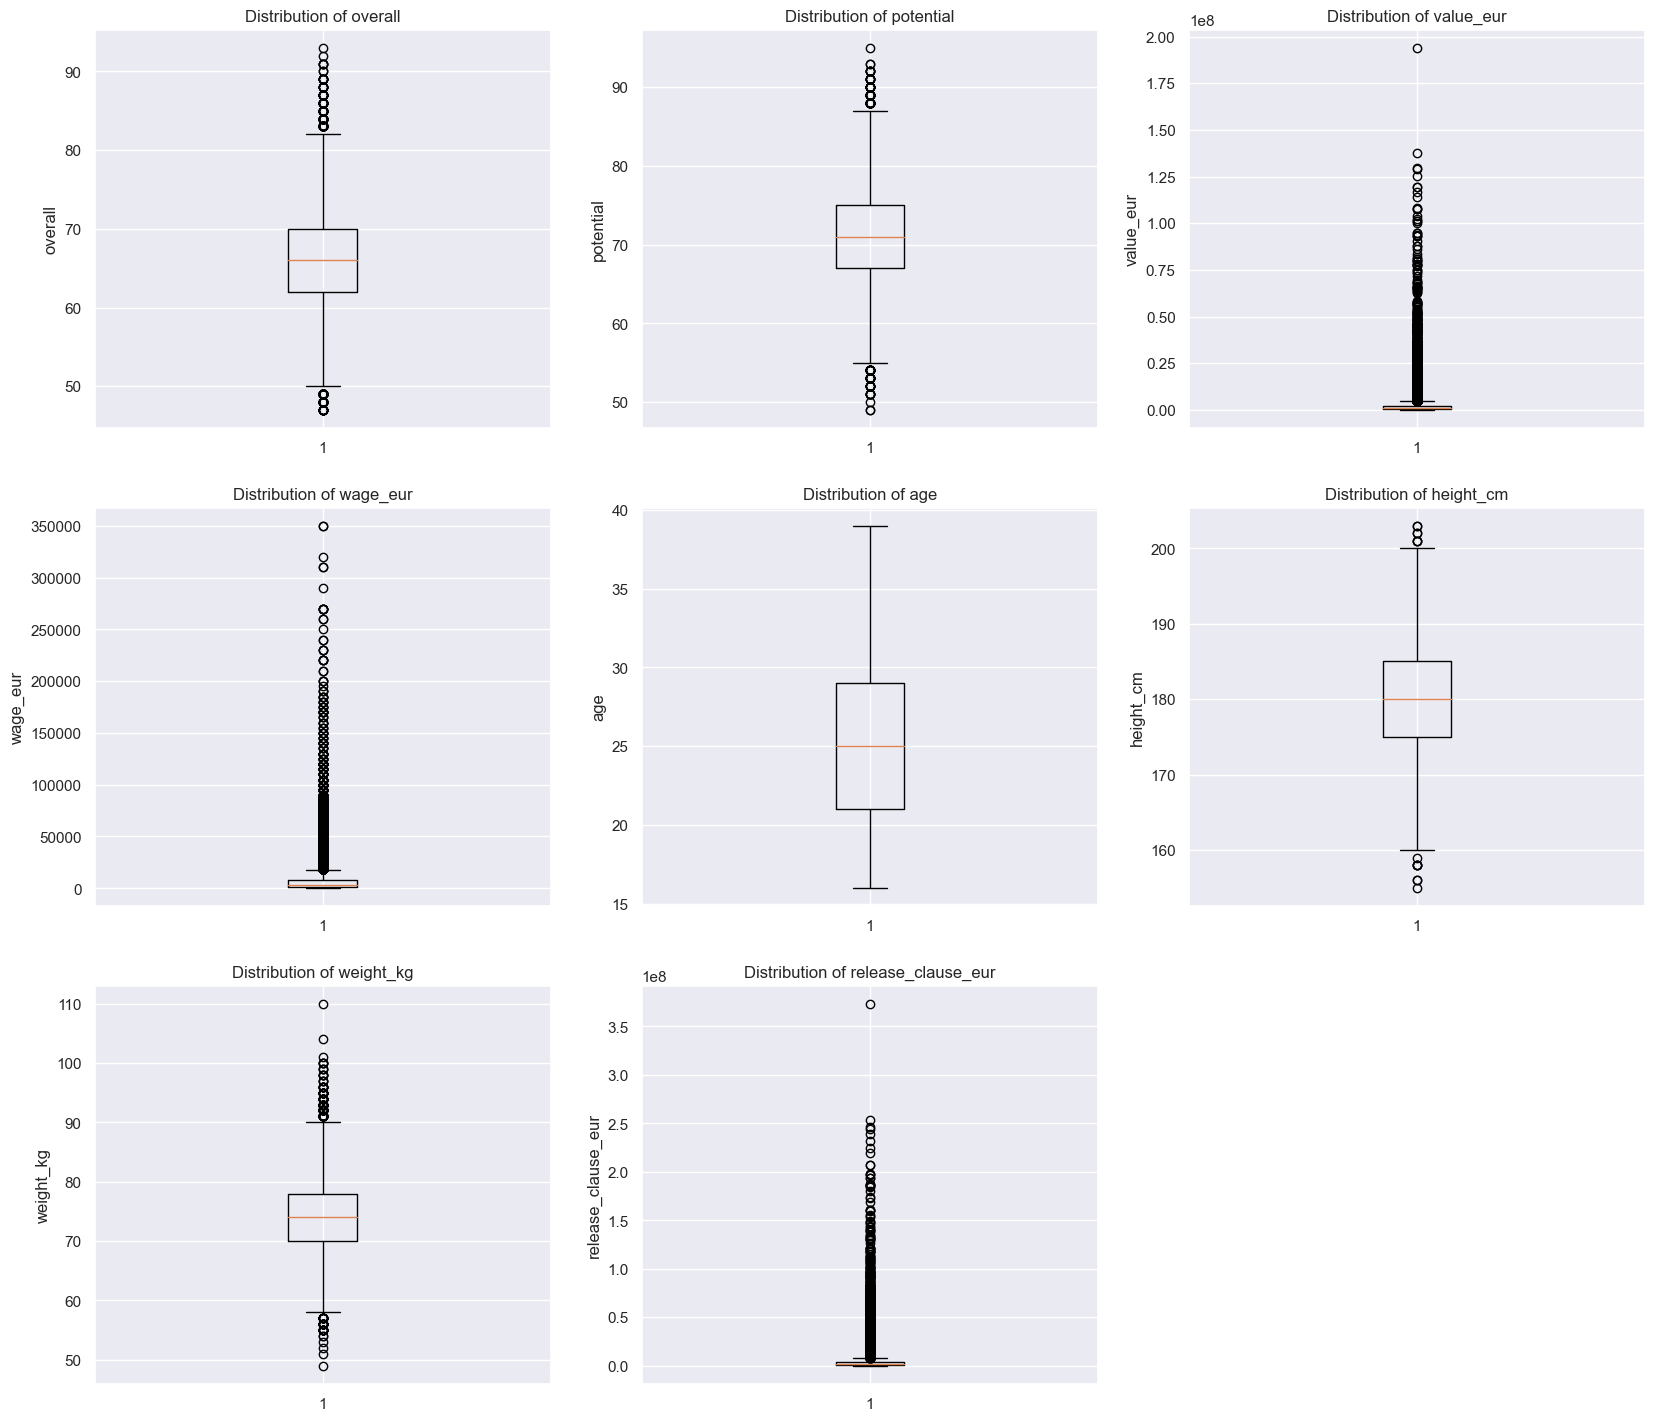

In [118]:
# looking at some general numeric columns
gen_num_cols = ['overall', 'potential', 'value_eur', 'wage_eur', 'age', 'height_cm', 'weight_kg', 'release_clause_eur']

plt.rcParams["figure.figsize"] = (20, 30)

i = 1
for col in gen_num_cols:
    plt.subplot(5, 3, i)

    plt.boxplot(data[col])

    plt.title("Distribution of " + col)
    plt.ylabel(col)

    i += 1

plt.show()

Interestingly, factors like age, height, and weight have a clear distribution. There is an evident mean and the quartiles are visible. On the other hand, factors relating to money like value, wage, or release clause don't have this visible distinction.

Finally, below we visualize the distributions of different attacking and defending qualities that players have. These are at a more granular level and can help us understand a player's strengths and weaknesses in more depth. The factors being considered here are 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys',
'defending_marking_awareness', 'defending_standing_tackle', and 'defending_sliding_tackle.'

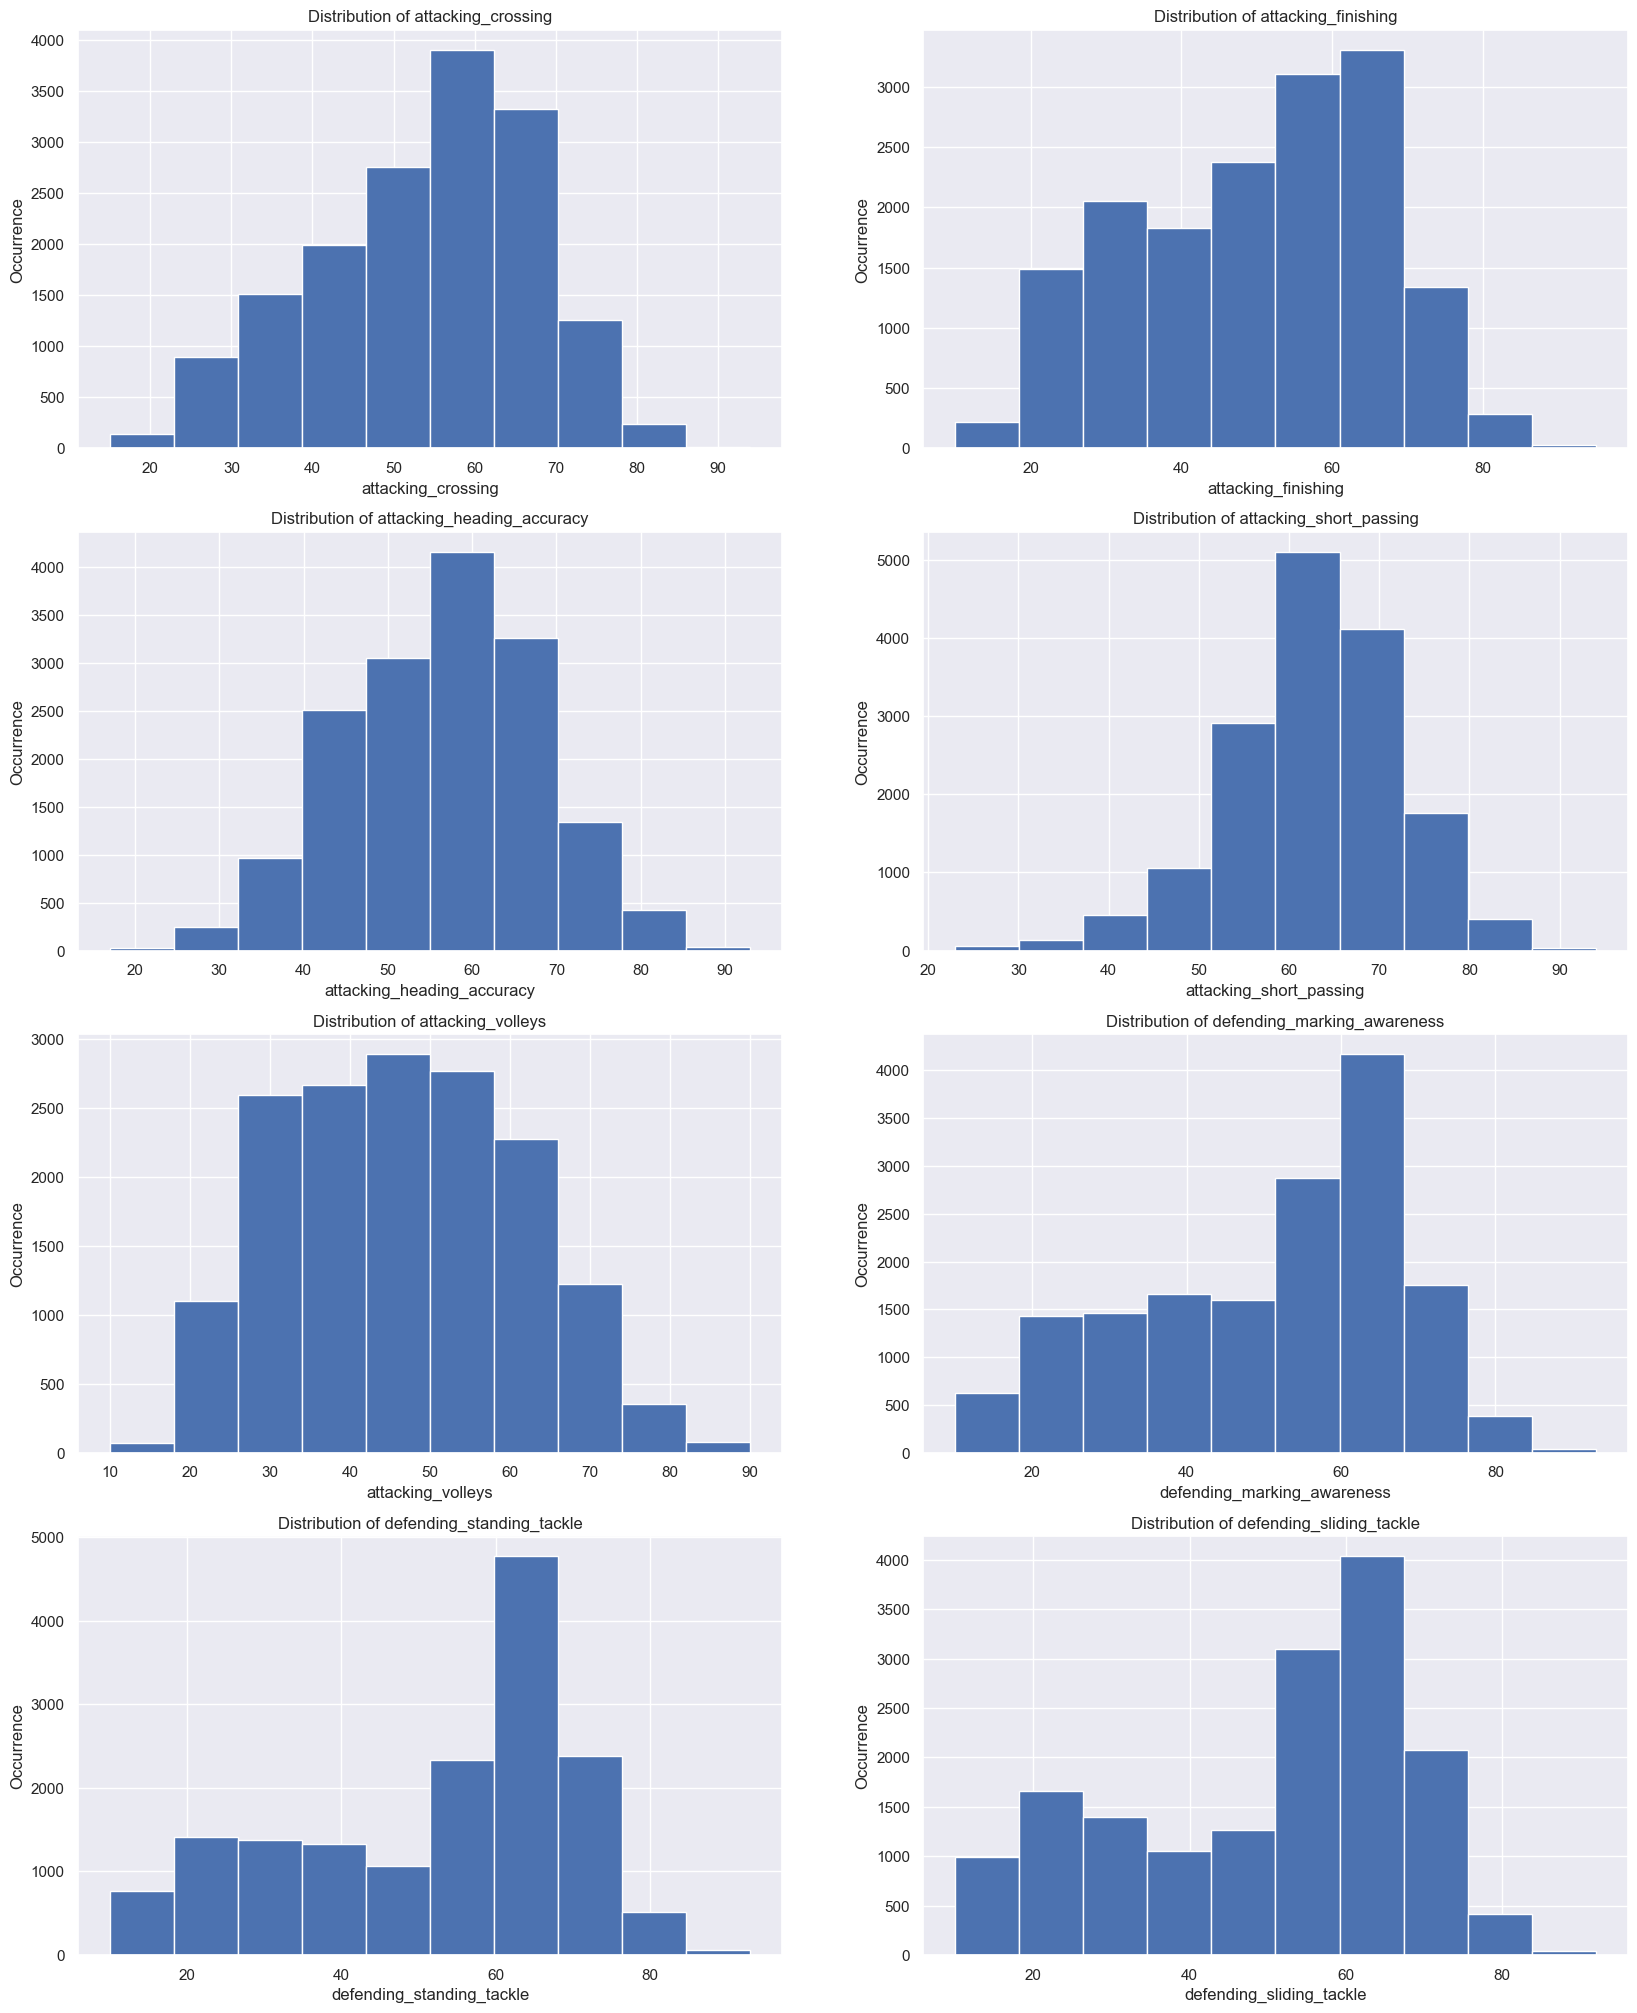

In [119]:
# looking at all column names relating to either offence or defense
attack_and_defense = ['attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys',
'defending_marking_awareness', 'defending_standing_tackle', 'defending_sliding_tackle']

plt.rcParams["figure.figsize"] = (20, 25)

i = 1
for col in attack_and_defense:
    plt.subplot(4, 2, i)

    plt.hist(data[col])

    plt.title("Distribution of " + col)
    plt.ylabel("Occurrence")
    plt.xlabel(col)

    i += 1

plt.show()

Now that we have visualized the distributions of several features, let's take a precursory look into what kinds of relationships they have. While it is not easy to visualize all of these relationships using separate plots, we have used scatterplots for 7 such particularly interesting relationships. Some of these features give us a good idea of what kinds of mental and physical qualities translate to skillful players. These were chosen somewhat arbitrarily in an attempt to link factors together that seem like they would pair up well, like "movement_sprint_speed" and "skill_dribbling."

The relationships being considered are: ("mentality_aggression", "mentality_composure"), ("pace", "movement_agility"), ("shooting", "skill_ball_control"), ("defending", "skill_ball_control"),
("movement_sprint_speed", "skill_dribbling"), ("power_strength", "physic"), ("mentality_vision", "shooting")

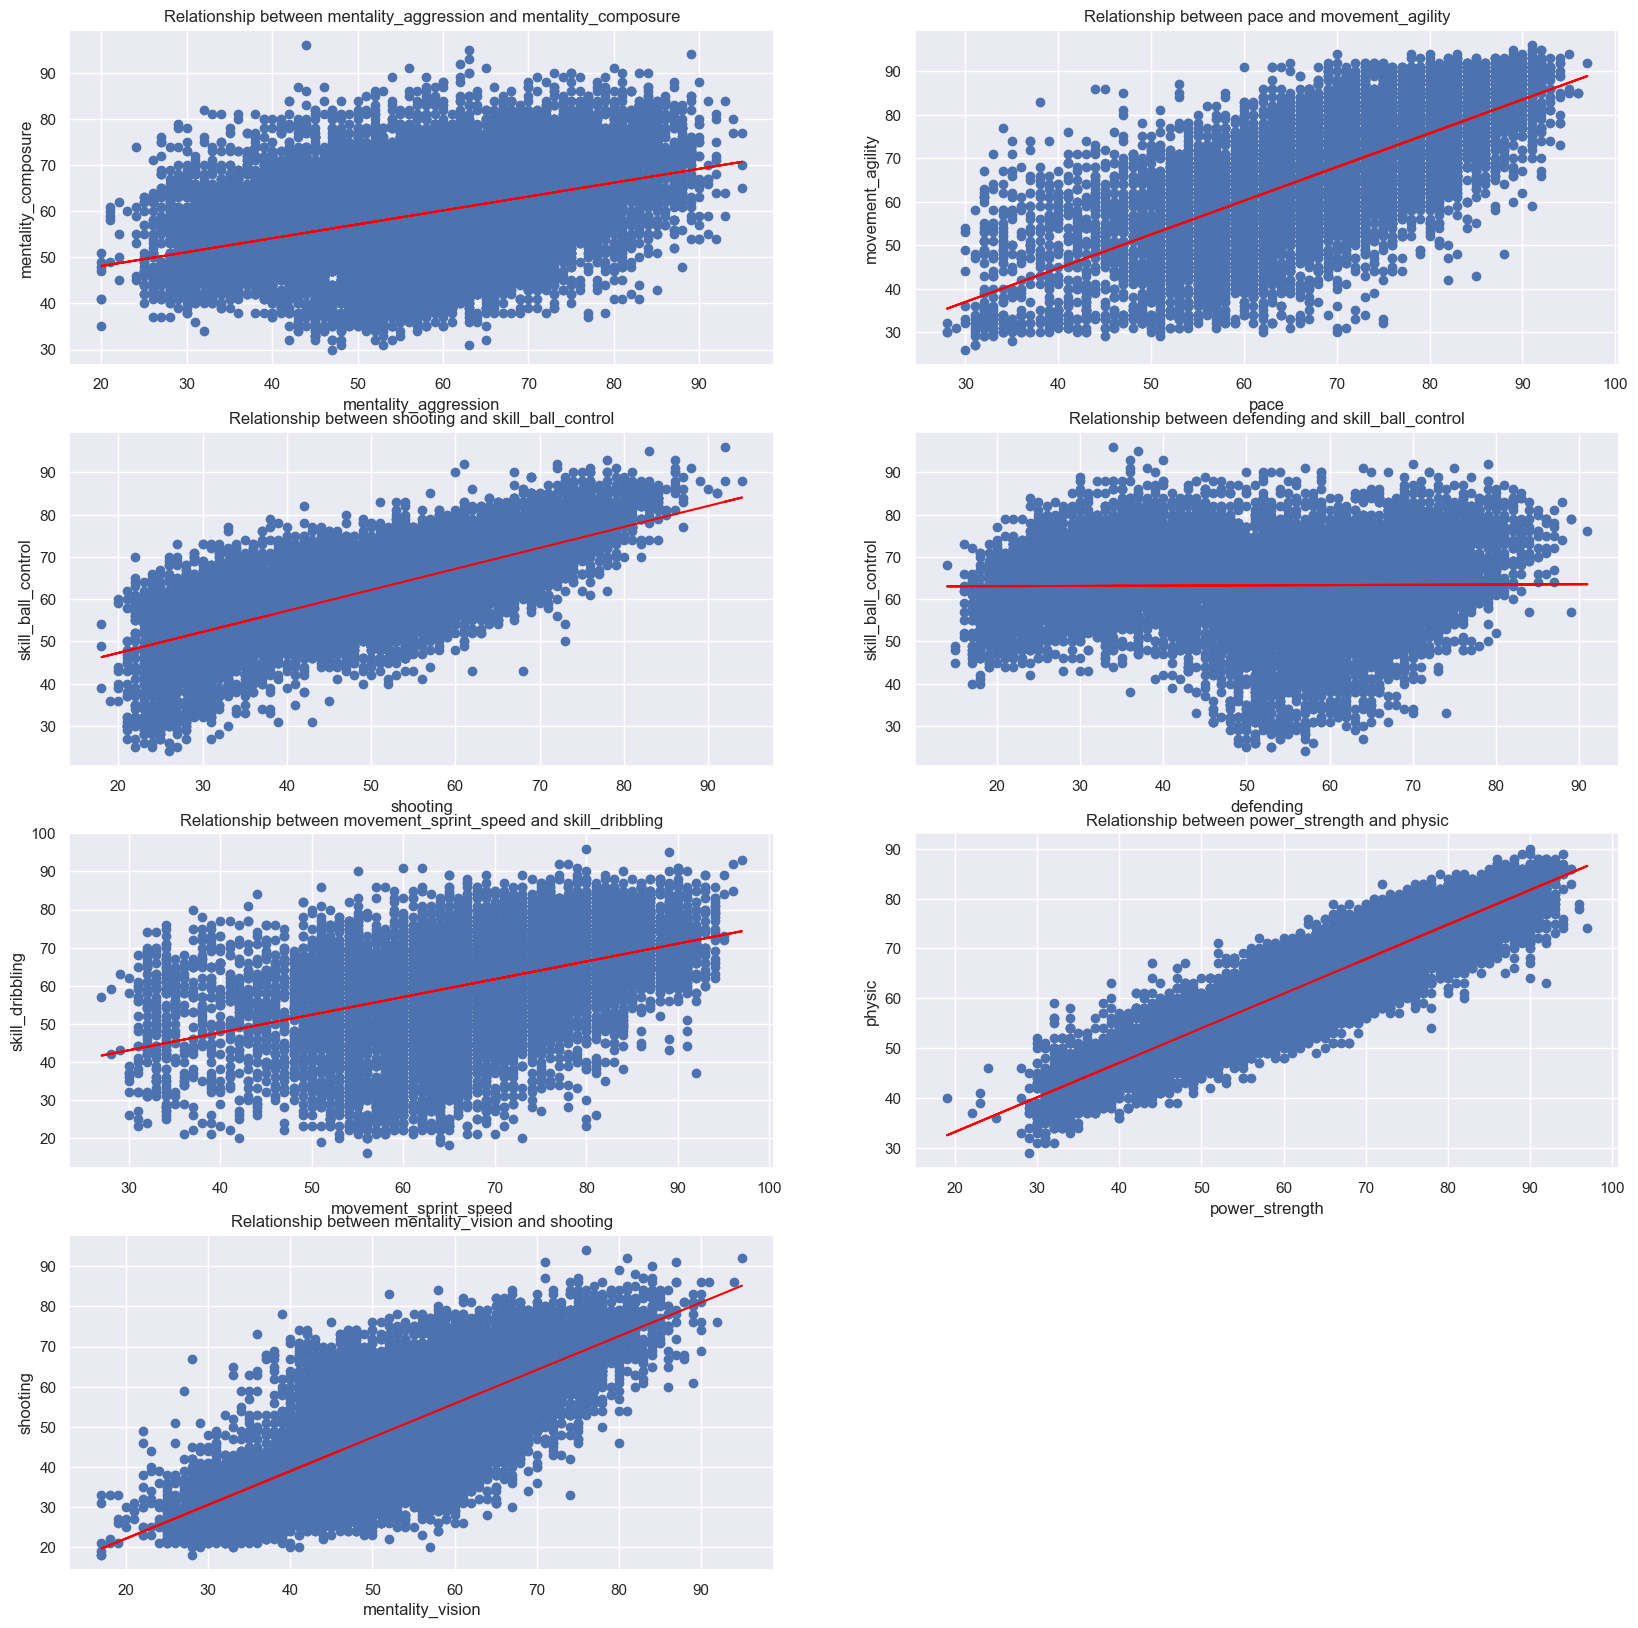

In [120]:
plt.rcParams["figure.figsize"] = (20, 20)

# certain interesting relationships between features that we will scatterplot below
relationships = [("mentality_aggression", "mentality_composure"), ("pace", "movement_agility"), ("shooting", "skill_ball_control"), ("defending", "skill_ball_control"),
("movement_sprint_speed", "skill_dribbling"), ("power_strength", "physic"), ("mentality_vision", "shooting")]

i = 1
for relationship in relationships:
    x, y = relationship

    plt.subplot(4, 2, i)

    # generate a regression line for the relationship between the features to be plotted as a line
    reg_line = np.polyfit(data[x], data[y], deg = 1)

    # plot the raw data
    plt.scatter(data[x], data[y])

    # plot the regression line
    plt.plot(data[x], [((reg_line[0] * x) + reg_line[1]) for x in data[x].to_list()], color = "red")

    plt.title("Relationship between " + x + " and " + y)
    plt.xlabel(x)
    plt.ylabel(y)

    i += 1

plt.show()

Some of the relationships are not that surprising and quite explanatory, such as power_strength and physic or pace and movement_agility. Others, however, are much more interesting. For example, mentality_vision and shooting have a very clear positive correlation. Interesting to see that perhaps a player that has a higher aptitude for recognizing gaps in the field and creating space is better for shooting. Another thing that is fascinating is the difference between the skill_ball_control vs shooting and skill_ball_control vs defending relationships. While it is evident that the higher the ball control skill level of a player, the higher the shooting skill they have, the same does not go for defending. This makes sense in the context of the skills required for these positions as defense is less about ball control and more so about tackling and pressuring well.

Now that we have taken a look at a small subset of the relationships by simply plotting them, let's dive deeper and visualize the correlation matrix of all of the numerical features of the dataset. Perhaps this will be very useful in determining what features we can or at least should be using in our regression model.

In [121]:
# correlation matrix of numerical columns (excluding the non-numerical columns like short_name)

corr_of_features = data.loc[:, ~data.columns.isin(["short_name", "player_positions", "club_name", "preferred_foot", "work_rate", "body_type"])].corr()

In [122]:
corr_of_features

,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,weak_foot,skill_moves,international_reputation,...,cam,lm,cm,rm,lwb,cdm,rwb,lb,cb,rb
overall,1.000000,0.639286,0.563198,0.605630,0.467196,0.067564,0.176871,0.222200,0.458455,0.478831,...,0.699758,0.712801,0.809907,0.712801,0.673498,0.647377,0.673498,0.605688,0.493931,0.605688
potential,0.639286,1.000000,0.536737,0.499024,-0.265077,0.019401,0.000747,0.142290,0.322159,0.368309,...,0.476672,0.486105,0.510429,0.486105,0.399457,0.360227,0.399457,0.352555,0.241639,0.352555
value_eur,0.563198,0.536737,1.000000,0.830890,0.046352,0.024628,0.048747,0.148997,0.309466,0.639206,...,0.421759,0.428799,0.455508,0.428799,0.350660,0.320598,0.350660,0.307569,0.219781,0.307569
wage_eur,0.605630,0.499024,0.830890,1.000000,0.166738,0.044954,0.083207,0.156608,0.319206,0.685719,...,0.439862,0.443335,0.488294,0.443335,0.382344,0.361970,0.382344,0.340012,0.263425,0.340012
age,0.467196,-0.265077,0.046352,0.166738,1.000000,0.074885,0.230857,0.116076,0.172746,0.228850,...,0.275611,0.263603,0.385694,0.263603,0.336653,0.380741,0.336653,0.315961,0.340110,0.315961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cdm,0.647377,0.360227,0.320598,0.361970,0.380741,0.110511,0.161816,0.042282,0.071558,0.286279,...,0.310647,0.343271,0.673328,0.343271,0.955961,1.000000,0.955961,0.968060,0.936948,0.968060
rwb,0.673498,0.399457,0.350660,0.382344,0.336653,-0.034106,0.027615,0.069911,0.171914,0.285728,...,0.411571,0.480221,0.717804,0.480221,1.000000,0.955961,1.000000,0.983304,0.860076,0.983304
lb,0.605688,0.352555,0.307569,0.340012,0.315961,0.043567,0.087654,0.016644,0.057183,0.252580,...,0.260832,0.328228,0.605394,0.328228,0.983304,0.968060,0.983304,1.000000,0.928129,1.000000
cb,0.493931,0.241639,0.219781,0.263425,0.340110,0.270444,0.296569,-0.059504,-0.140396,0.207257,...,0.007596,0.046114,0.401577,0.046114,0.860076,0.936948,0.860076,0.928129,1.000000,0.928129


These numbers are somewhat meaningless on their own, so let's visualize in the form of a heat map.

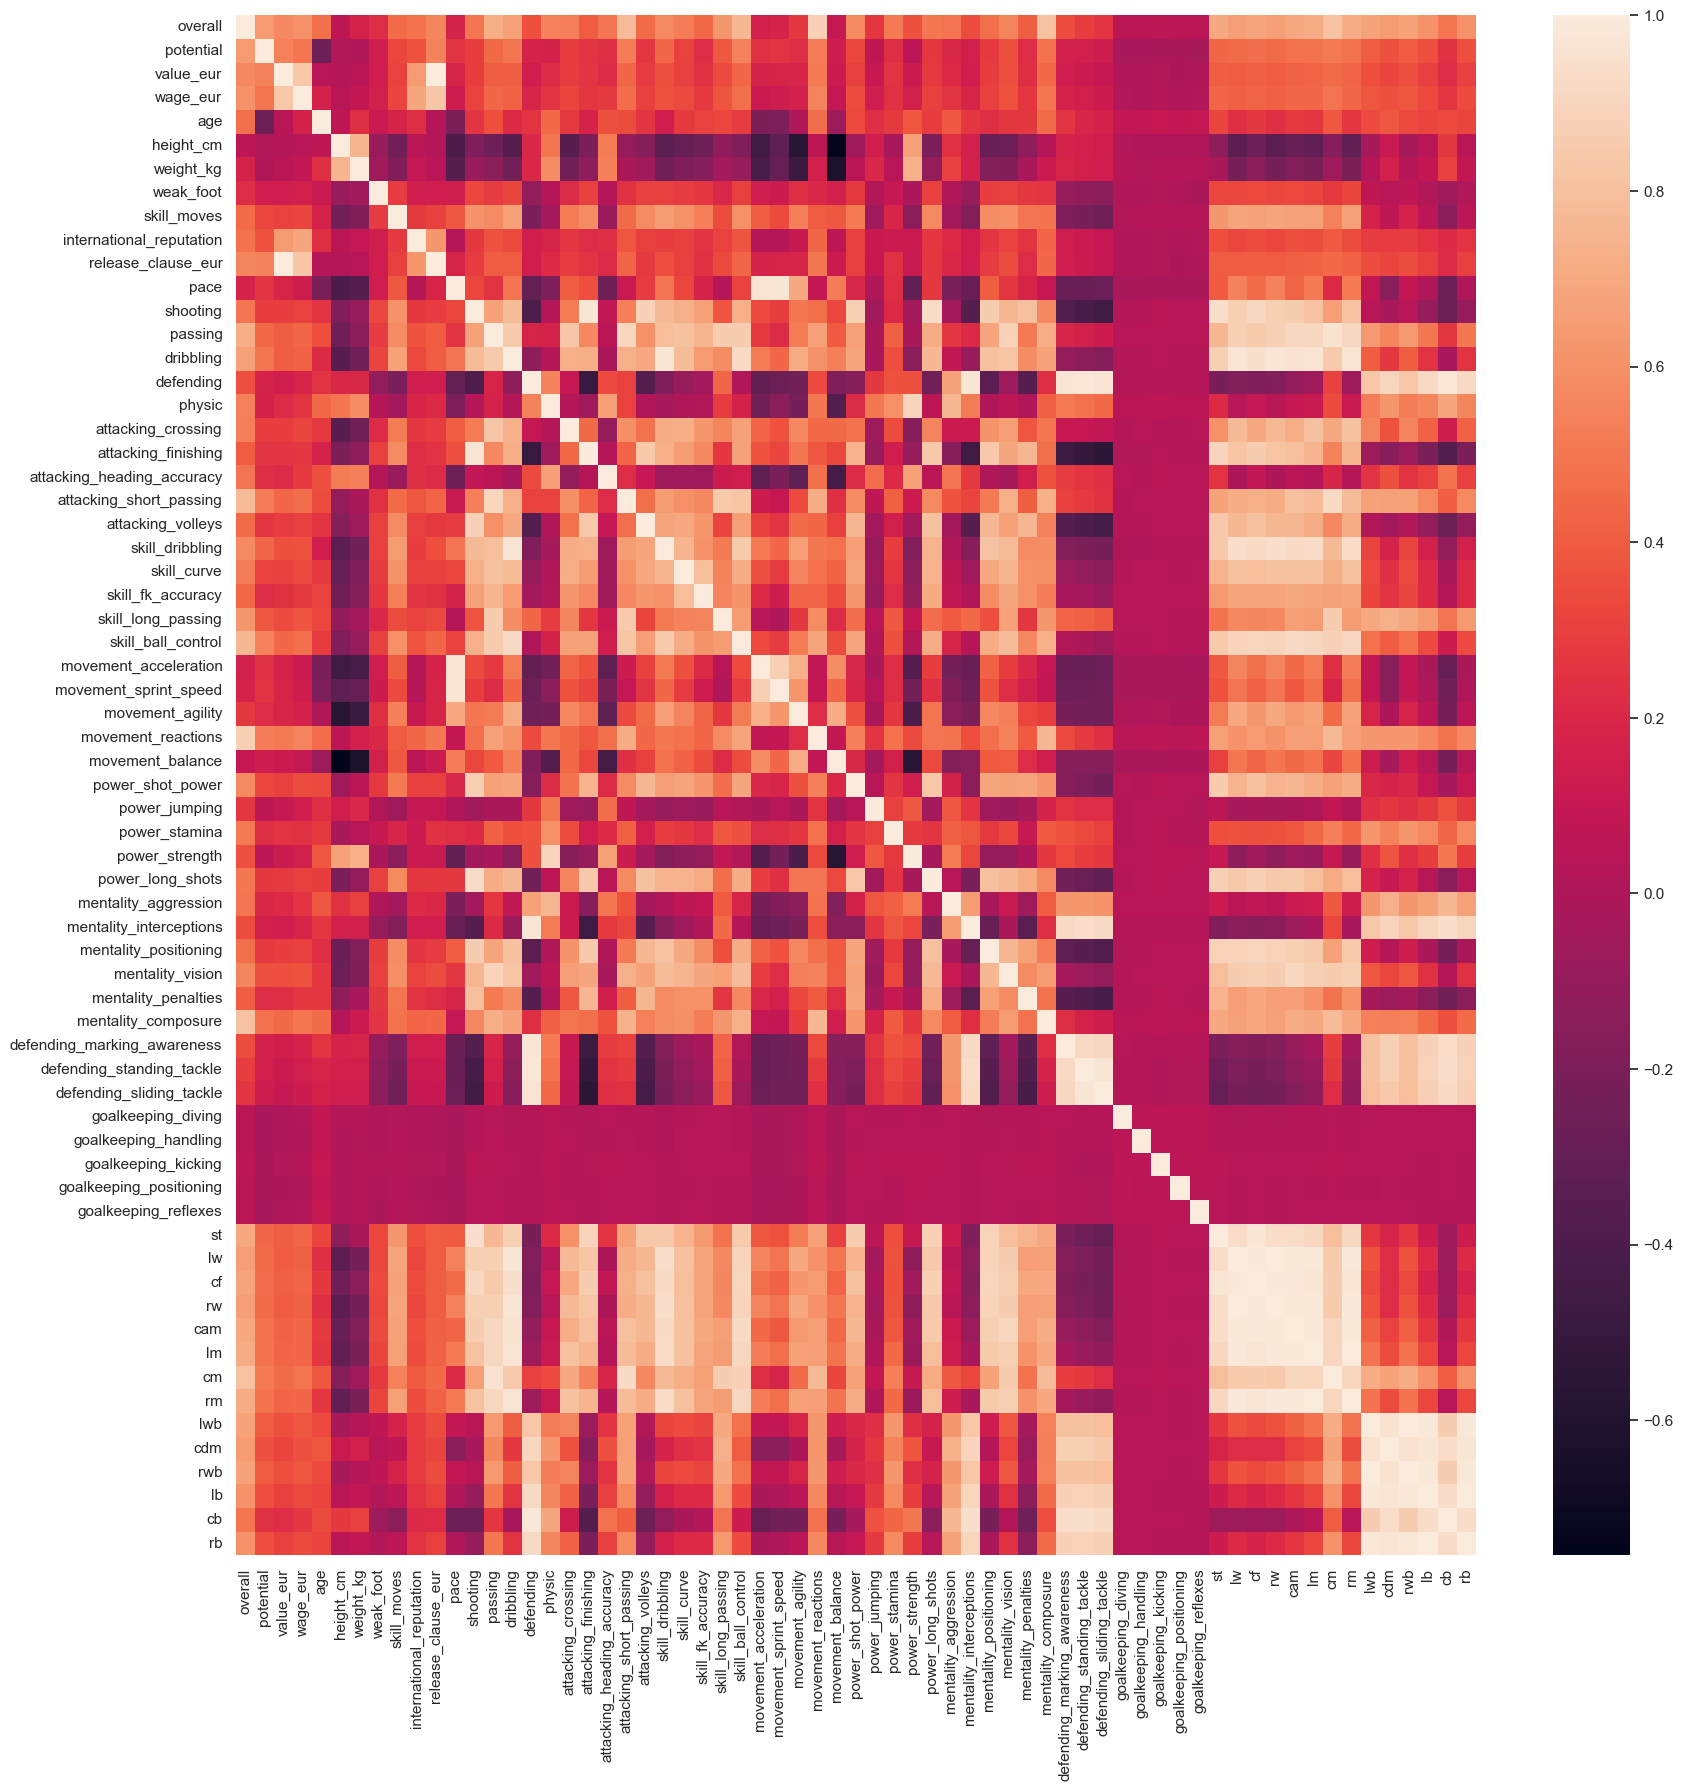

In [123]:
plt.rcParams["figure.figsize"] = (20, 20)
sns.heatmap(corr_of_features, xticklabels = corr_of_features.columns, yticklabels = corr_of_features.columns)
plt.show()

Notice how the correlation between the main goalkeeper traits and others are all very close to 0 and therefore not very helpful for us. We can confirm this by looking at the the top correlation values for one of the goalkeeper traits below.

In [124]:
# looking at features of goalkeeping diving from the above correlation matrix
corr_of_features["goalkeeping_diving"].sort_values(ascending = False)

goalkeeping_diving       1.000000
age                      0.088396
goalkeeping_reflexes     0.058399
goalkeeping_handling     0.056807
goalkeeping_kicking      0.055131
                           ...   
movement_balance        -0.017543
movement_sprint_speed   -0.020504
potential               -0.022315
pace                    -0.023156
movement_acceleration   -0.024314
Name: goalkeeping_diving, Length: 65, dtype: float64

Notice how goalkeeping_diving has very little relationship with any other factor, so goalkeeper features will be removed.

In [125]:
# remove all goalkeeper features because they have correlations of almost 0 with everything else other than themselves

data.drop(["goalkeeping_diving", 'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', "goalkeeping_reflexes"], axis = 1, inplace = True)

In [126]:
data

,short_name,player_positions,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_name,...,cam,lm,cm,rm,lwb,cdm,rwb,lb,cb,rb
0,L. Messi,"RW, ST, CF",93,93,78000000.0,320000.0,34,170,72,Paris Saint-Germain,...,93,91,87,91,66,64,66,61,50,61
1,R. Lewandowski,ST,92,92,119500000.0,270000.0,32,185,81,FC Bayern München,...,86,84,80,84,64,66,64,61,60,61
2,Cristiano Ronaldo,"ST, LW",91,91,45000000.0,270000.0,36,187,83,Manchester United,...,86,86,78,86,63,59,63,60,53,60
3,Neymar Jr,"LW, CAM",91,91,129000000.0,270000.0,29,175,68,Paris Saint-Germain,...,89,89,82,89,67,63,67,62,50,62
4,K. De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,181,70,Manchester City,...,89,89,89,89,79,80,79,75,69,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16015,Song Defu,CDM,47,52,70000.0,1000.0,22,180,64,Wuhan FC,...,46,47,46,47,48,46,48,48,46,48
16016,C. Porter,CM,47,59,110000.0,500.0,19,175,70,Derry City,...,47,49,47,49,49,46,49,48,44,48
16017,N. Logue,CM,47,55,100000.0,500.0,21,178,72,Finn Harps,...,47,48,47,48,47,46,47,47,45,47
16018,L. Rudden,ST,47,60,110000.0,500.0,19,173,66,Finn Harps,...,45,45,39,45,33,29,33,32,26,32


Updated dataframe with goalkeeper columns dropped. We now have 16020 rows and 66 columns. Although we are in the exploratory data analysis section, there is absolutely nothing wrong with revisiting a previous part of the data science pipeline! In fact, we should expect to cycle between different stages if we are doing everything right as we are uncovering more information than we previously knew while performing more fine-grained analysis.

Let's visit the updated heat map now.

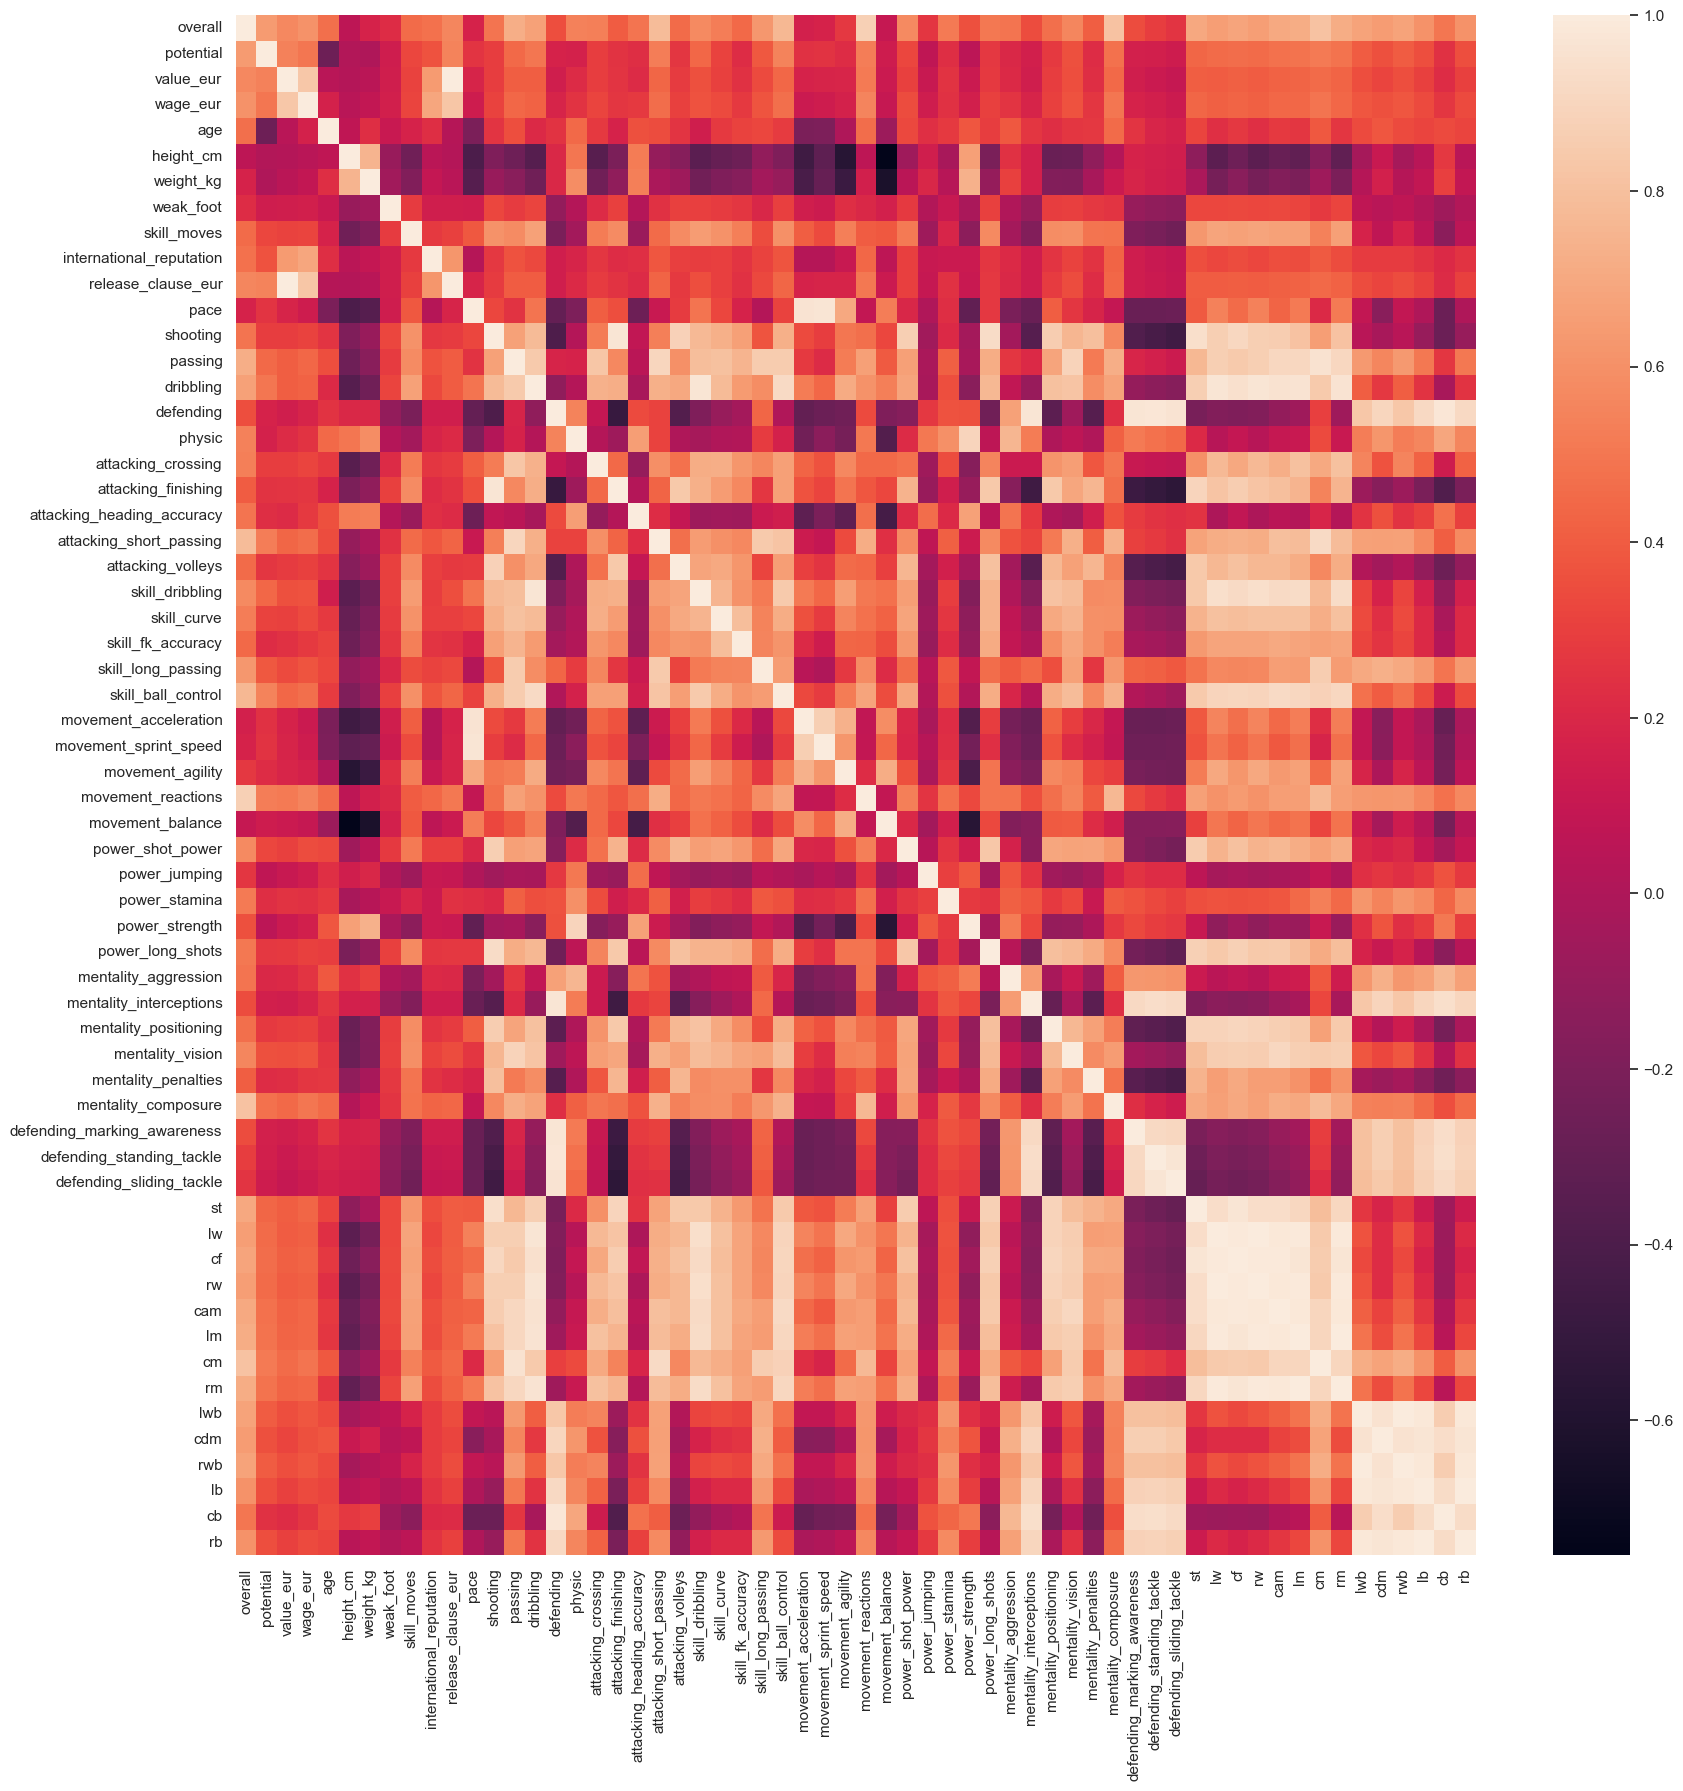

In [127]:
# creating the correlation matrix
corr_of_features = data.loc[:, ~data.columns.isin(["short_name", "player_positions", "club_name", "preferred_foot", "work_rate", "body_type"])].corr()

# visualizing the heat map
plt.rcParams["figure.figsize"] = (20, 20)
sns.heatmap(corr_of_features, xticklabels = corr_of_features.columns, yticklabels = corr_of_features.columns)
plt.show()

Just from a glance, the reader can notice some clear patterns visible above. For example, defending critierias are positively correlated to rb, cb, lb and other defensive positions. Shooting, passing, and dribbling are also positively correlated to the st, lw, cf, etc positions. Apart from this, there are many other interesting relationships that be seen above.

Let's go deeper into understanding the top correlation factors and look at the top 20.

In [128]:
# factors with the highest correlations
corr_of_features["value_eur"].sort_values(ascending = False).iloc[:20]

value_eur                   1.000000
release_clause_eur          0.995381
wage_eur                    0.830890
international_reputation    0.639206
overall                     0.563198
potential                   0.536737
movement_reactions          0.509612
cm                          0.455508
mentality_composure         0.446591
skill_ball_control          0.439098
attacking_short_passing     0.434476
lm                          0.428799
rm                          0.428799
cam                         0.421759
cf                          0.411645
st                          0.406570
passing                     0.406318
dribbling                   0.405573
lw                          0.402962
rw                          0.402962
Name: value_eur, dtype: float64

Ignore value_eur, release_clause_eur, wage_eur, because these factors would clearly corerelate with value_eur and does not provide any additional insight to the analyis. Interestingly, the factor with the highest correlation with value is international_reputation. It appears that the more well known a player is on a global, the higher evaluated they will be monetarily. 

Why would international reputation correlate the most with player value? Well, let's understand how football clubs money. One of the biggest sources of income is merchandise (kits and jerseys) alongside sponsorships and ticket sales (https://medium.com/@topebush/many-lovers-of-the-beautiful-game-of-football-still-cant-wrap-their-heads-around-how-clubs-afford-d6a2f5c93d36). If we think about football jerseys that are regularly encountered, we think about people wearing shirts of Ronaldo, Messi, or Neymar Jr. Alongside their world-renowned reputation, they are incredibly talented players. Clubs are willing to pay more for players given that the player can further promote the club and boost sales. 

look at the features with the lowest correlations.

In [129]:
corr_of_features["value_eur"].sort_values(ascending = True).iloc[:20]

height_cm                      0.024628
age                            0.046352
weight_kg                      0.048747
defending_sliding_tackle       0.100267
power_jumping                  0.108144
power_strength                 0.119955
movement_balance               0.120972
defending_standing_tackle      0.122916
defending_marking_awareness    0.144115
mentality_interceptions        0.144528
defending                      0.148601
weak_foot                      0.148997
movement_acceleration          0.172126
movement_sprint_speed          0.180278
pace                           0.182601
movement_agility               0.186286
mentality_aggression           0.208596
physic                         0.215503
attacking_heading_accuracy     0.218747
cb                             0.219781
Name: value_eur, dtype: float64

Let's understand why height, age, and weight are the lowest on the list and have little correlation with player value. To interpret this, let's see how these factors play out in the top 25 clubs and later generalize those results.

In [130]:
# getting top 25 most valuable clubs
i=0
t25 = []
for n in cv:
    if i == 25:
        break
    t25.append(cv.keys()[i])
    i+=1

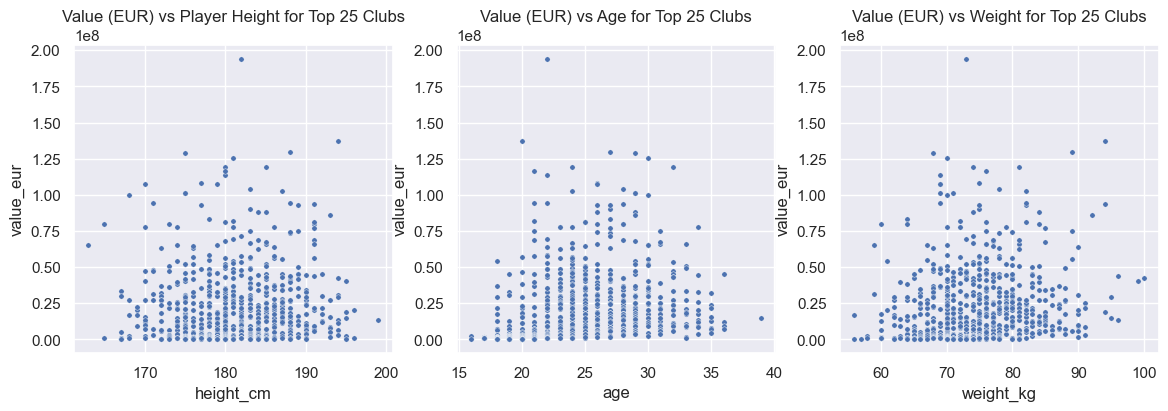

In [131]:
# breaking data down into just the top 25 clubs
top_25  = data[data["club_name"].isin(t25)]

sns.set(rc = {'figure.figsize':(14,4)})
plt.subplot(1, 3, 1)
# creating plot to show player value by their overall rating (for the top 10 clubs only)

sns.scatterplot(data=top_25, x="height_cm", y="value_eur", s = 15)
plt.title("Value (EUR) vs Player Height for Top 25 Clubs")

plt.subplot(1, 3, 2)
sns.scatterplot(data=top_25, x="age", y="value_eur", s = 15)
plt.title("Value (EUR) vs Age for Top 25 Clubs")

plt.subplot(1, 3, 3)
sns.scatterplot(data=top_25, x="weight_kg", y="value_eur", s = 15)
plt.title("Value (EUR) vs Weight for Top 25 Clubs")

plt.show()

As expected, there is no visible correlation for any of these factors. This can be attributed to the fact that in soccer, most players are of an average build, so their height and weight won't primarily have an impact on their value. For age, there is a wide mix of both younger and older players across various clubs. Some younger players shine and so do some older players. The same can be said about the opposite where young/old players don't perform well.

Now that we've done analysis on our data and extracted the most relevant features, let's create a model using these features to predict on a player's total value in Euros. Note that there are several methods to do this and plenty of libraries to choose from. We have decided to go with the statsmodel library's linear regression (ordinary least squares) module that helps us simply assign different cooefficients and intercepts for each feature to calculate a final prediction.

The first model we will create will simply use the top feature, international reputation. This is to get an idea of how simple we can restrict our model to be.

In [132]:
first_model = ols(formula = "value_eur ~ international_reputation", data = data).fit()
print (first_model.summary())

                            OLS Regression Results                            
Dep. Variable:              value_eur   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.409
Method:                 Least Squares   F-statistic:                 1.107e+04
Date:                Fri, 16 Dec 2022   Prob (F-statistic):               0.00
Time:                        23:18:58   Log-Likelihood:            -2.7285e+05
No. Observations:               16020   AIC:                         5.457e+05
Df Residuals:                   16018   BIC:                         5.457e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

Let's visualize this model (based on solely international reputation) and see how it is to predict player value.

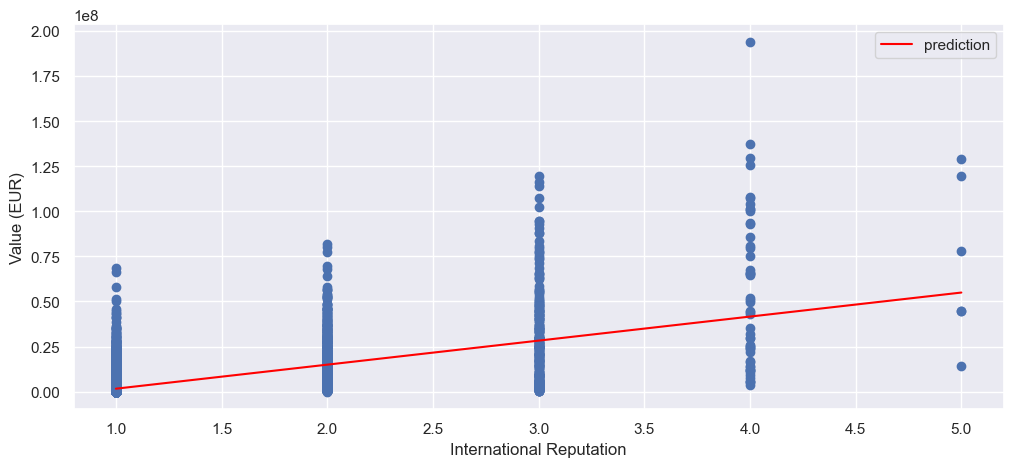

In [133]:
plt.rcParams["figure.figsize"] = (12, 5)

# making scatter plot where x axis is reptuation and y axis is value
x_scatter, y_scatter = data["international_reputation"], data["value_eur"]

# plotting our model's regression line based on the data filtered on just international reputation
x_plot, y_plot = data["international_reputation"], first_model.predict(data)

# displaying the plots
plt.scatter(x_scatter, y_scatter)
plt.plot(x_plot, y_plot, color = "red", label = "prediction")
plt.xlabel("International Reputation")
plt.ylabel("Value (EUR)")
plt.legend()
plt.show()

The regressional model based on this sole feature of reputation does seem to be moving in the appropriate positive linear direction. Let's expand on this finding further. 

Here, we will calculate the normalized values of player value across the data and compare them to the residuals (actual value - predicted value) in the form of a scatterplot to gain a better understanding of the relationship being described by the model.

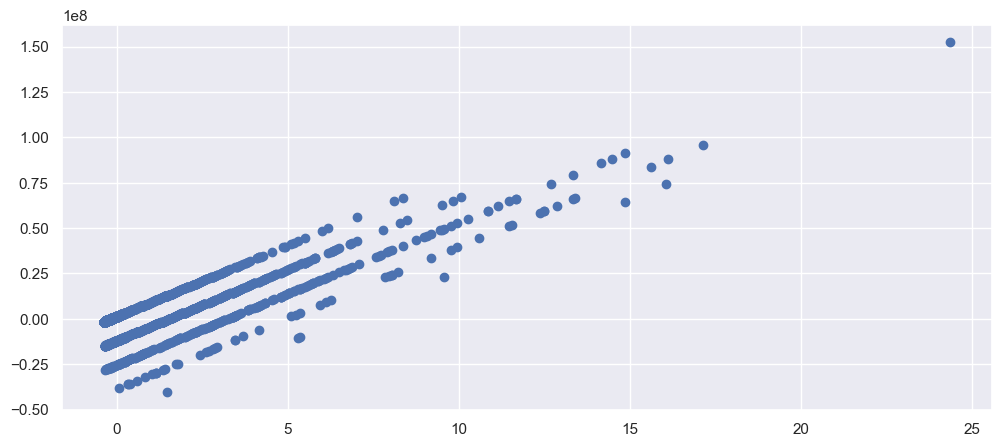

In [146]:
# creating list of normalized values based on player value
normalized_values = (data["value_eur"] - data["value_eur"].mean())/(data["value_eur"].std())

# creating scatter plot of the just calculated normalized values and residuals from the model
plt.scatter(normalized_values, (data["value_eur"] - first_model.predict(data)).to_list())
plt.xlabel("Normalized Value")
plt.ylabel("Residual of First Model")
plt.show()

From the above plots, we can see that since the international reputation is a set of 5 discrete values, our model doesn't fit a regression line too well on to the data. By including more features with a wider range of values and incorporating this into our model, we should be able to have our model account for more of the variation. If you notice our model summary above, it has a moderately low r-squared of around 0.409, which means that about 40.9% of the variation in the value of a player can be explained by our model's parameter which is international reputation. Let us see if we can improve on this by taking into account more features.

Now, instead of just using the top feature of internation reputation, let's implement the top 5: international_reputation, overall, potential, movement_reactions, and cm.

In [153]:
corr_of_features["value_eur"].sort_values(ascending = False).iloc[3:8]

international_reputation    0.639206
overall                     0.563198
potential                   0.536737
movement_reactions          0.509612
cm                          0.455508
Name: value_eur, dtype: float64

Here, we will use these 5 features into the OLS model.

In [221]:
# value we're predicting
predict = "value_eur"

# obtaining the list of correlating features
features = ""
top_features = corr_of_features["value_eur"].sort_values(ascending = False).iloc[3:23].index.to_list()

# taking the top 8 features 
n = 8
for i in range(n):
   features += (top_features[i] + " * ") if i != n - 1 else top_features[i]

# constructing the string later used in the ols model
ols_formula = predict + " ~ " + features

# generating the new OLS model
feature = "value"
second_model = ols(formula = ols_formula, data = data).fit()

In [222]:
print (second_model.summary())

                            OLS Regression Results                            
Dep. Variable:              value_eur   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     3398.
Date:                Fri, 16 Dec 2022   Prob (F-statistic):               0.00
Time:                        23:33:58   Log-Likelihood:            -2.4741e+05
No. Observations:               16020   AIC:                         4.952e+05
Df Residuals:                   15835   BIC:                         4.966e+05
Df Model:                         184                                         
Covariance Type:            nonrobust                                         
                                                                                                                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------

Let's visualized the normalized values of this newly generated model.

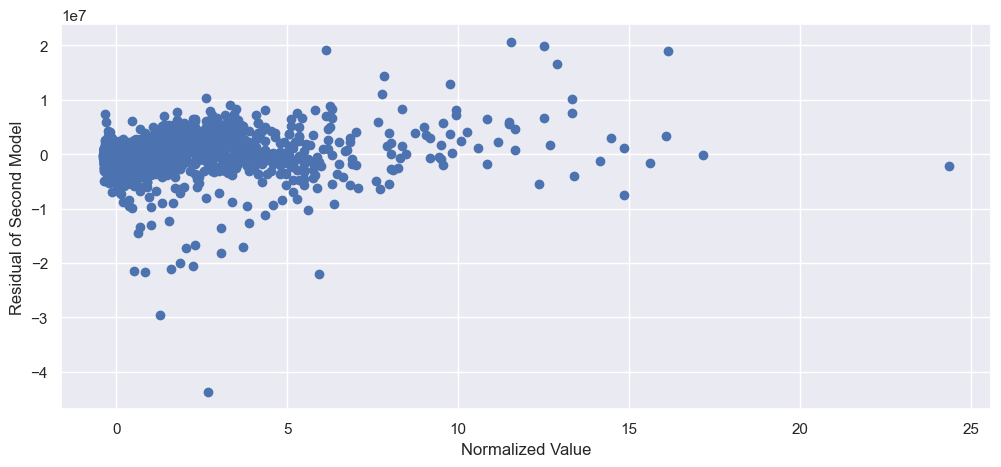

In [223]:
# calculating the normalized values of the player values
normalized_values = (data["value_eur"] - data["value_eur"].mean())/(data["value_eur"].std())

# generating scatter plot using the calculated normalized values and the residuals
plt.scatter(normalized_values, (data["value_eur"] - second_model.predict(data)).to_list())
plt.xlabel("Normalized Value")
plt.ylabel("Residual of Second Model")
plt.show()

This models seems to be much better than the first one. Taking just 4 more features into account, our r^2 value is much higher and now close to 95% of the variation in the value can be explained with our new model! Observe that the residuals aren't increasing as steadily as the first plot either. This means we are doing better for all ranges of player values and predicting fairly well on different combinations of factors, etc. From the above plot, we can see that the residuals seem to be much more evenly scattered/distributed, which is an indicator that our model is performing well.

Also, an important part of the data science pipeline is to perform significance testing. Thanks to the OLS library provided to us, we can see that the probabilities that all the coefficients are not significantly different from 0 are less than 0.05, which is a good significance level. This means that all of our features and their interactions are playing some role in our model and contribute to the overall prediction of the value!

In the summaries produced by the models above, one thing that is noticeable is that there seems to be the issue of multicollinearity between our variables. To attempt to resolve this, we will also take a look at using Ridge Regression, which uses L2 Regularization to account for the large variances and help predict the target variable better.

In [184]:
# Initializing our Ridge Regression Model
clf = Ridge(alpha = 1.0)

In [196]:
# Preparing the input data for the model using the top 15 features
top_15_features = corr_of_features["value_eur"].sort_values(ascending = False).iloc[3:18].index.to_list()
x = np.array(data[top_15_features])
print(x.shape)

(16020, 30)


In [197]:
# Preparing the target variable for the model
y = np.array(data["value_eur"])
print(y.shape)

(16020,)


WE know have our input data and target data in the format that the Ridge model expects, which is a numpy nd-array with the first dimension being the number of samples and the second dimension being the number of features.

In [198]:
# Training the model
clf.fit(x, y)

Ridge()

In [199]:
# R^2 Value of the Ridge Regression Model
clf.score(x, y)

0.5450286245611904

This is somewhat suprisingly not as good as we expected. However, our second OLS model performed very well and it would perform well on out-of-sample data, so we would likely use that to predict on the value in euros using features of a given player. It seems that this ridge regression model's residuals are quite similar to our first model which only used international reputation as a feature, which might suggest the features are quite highly correlated with each other, which we can observe for at least some of them using our above correlation matrix. Seems like looking into the internals of Ridge Regression might give us a better idea of what's going on under the hood, but we have a well-performing model for now which was our initial goal as data-scientists and this is another good example of how the data science pipeline involves getting results and then going back to tune the model.

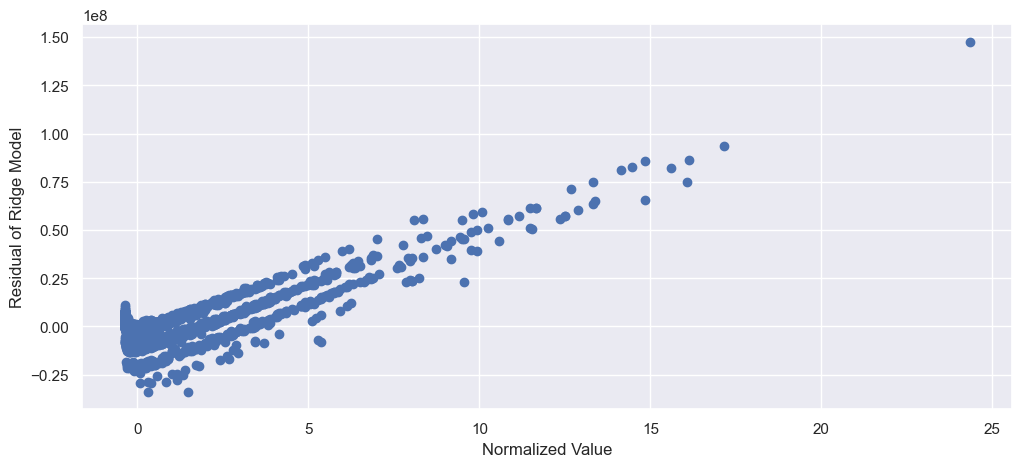

In [224]:
# calculating standardized values of player values
standardized_values = (data["value_eur"] - data["value_eur"].mean())/(data["value_eur"].std())

# generating scatter plot of these standardized values against residuals predicted by the OLS model
plt.scatter(standardized_values, (data["value_eur"] - clf.predict(x)).to_list())

plt.xlabel("Normalized Value")
plt.ylabel("Residual of Ridge Model")

plt.show()

Getting to this final stage of having a good model to work with wasn't easy. We first had to take a preliminary look at the data to figure out what kinds of columns, rows, and types we were dealing with. Then we had to remove certain columns, take care of missing values, and discover similar such issues which led us to keep refining the data until we had everything we needed to work with. Then we had to plot the distributions of different variables/features to understand them, visualize the relationships between these variables, and take a look at how correlated these are to our target variable which was the value in euros. Only after this could we create linear regression models and even then we had to analyze the probabilities of the coefficients of the model being significantly different than zero or not, the r^2 value, and compare and contrast different methods of feature/model selection. So what? To get an idea of how one can use all of this analysis, we present a summary communciating our findings below.

### Summary of Insights
<br>
 Football clubs are willing to pay tens of millions of euros for top players. The goal of this analysis was to understand what player factors would result
 in them being evaluated at a greater price.
</br>
<br>
The factor that correlated the most with player value was their international reputation. Let's understand why this is. As explained previously, one of the biggest sources of income for football clubs are their merchandise sales (jerseys and kits) and ticket sales. A player is like an advertisement for the club. The more famous they are, they more money they can attract for the club. This fame correlates with their rating as well. The better skilled and rated a player is, the more reputation globally they gain as well. So, clubs will be willing to pay more for highly popular and talented players. A player's value can be attributed to their international reputation due to the income they will generate.
</br>
<br>
The other factors (that were also used in the second OLS model) that correlated with value were: overall, potential, movement_reactions, and cm. Let's understand why each of these factors would impact player value. First, 'overall' refers to the average of the player's main stats. This ranges from their physique and pace to their shooting and dribbling. Overall is the first 'skill-based' attribute with the greatest correlation, and this is very appropriate, as top players must be well-balanced in all aspects of their play. This ties into the factor of 'cm.' This refers to the position of center midfield — one of the most physically demanding positions in football. The ability to play in the center of pitch requires a player to be versatile and innovative. Though some players don't play as a cm as their starting position, as the game plays on, players are required to move around the pitch, and understanding the value of a cm is necessary in determining the status of a player; ultimately, this is shown to have an impact on value. Potential is straightforward. Young players, in particular, have great potentials. Clubs would leap at the opportunity to reel in a player. This is a necessary skill for all players to have in their arsenal in order to play at profesional levels. This is the second 'skill-based' feature after overall, and as expected, since it makes the player more valuable, it will result in them being worth more.
</br>
<br>
Overall, football clubs are willing to pay more money if the player is 1) popular 2) well-rounded skills in all aspects 3) potential to grow further. 
</br>